In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the differential equation
def model(x, t, K, n, m):
    dxdt = x * (1 - x / K - n / (1 + m * x))
    return dxdt

# Generate synthetic data
K = 10.0
n = 0.5
m = 0.1
t = np.linspace(0, 100, 1000)
initial_condition = 1.0
true_solution = odeint(model, initial_condition, t, args=(K, n, m))

# Define the neural network model
model_nn = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network to approximate the solution
model_nn.fit(t, true_solution, epochs=1000, verbose=0)

# Use the trained model to predict the solution
predicted_solution = model_nn.predict(t)

# Plot the results using Plotly
fig = go.Figure()

# Plot the true solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))

# Plot the neural network predicted solution
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

fig.update_layout(title='Differential Equation Solution using Neural Network',
                  xaxis_title='Time (t)',
                  yaxis_title='Solution (x)')

fig.show()


KeyboardInterrupt: 

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Define the differential equation
def model(x, t, K, n, m):
    dxdt = x * (1 - x / K - n / (1 + m * x))
    return dxdt

# Generate synthetic data
K = 10.0
n = 0.5
m = 0.1
t = np.linspace(0, 100, 1000)
initial_condition = 1.0
true_solution = odeint(model, initial_condition, t, args=(K, n, m))

# Generate sample training points
sample_indices = np.random.choice(len(t), size=100, replace=False)
sample_t = t[sample_indices]
sample_true_solution = true_solution[sample_indices]

# Define the custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the neural network model
model_nn = models.Sequential([
    layers.Dense(20, activation='relu', input_shape=(1,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1)
])

# Compile the model with the custom loss function
model_nn.compile(optimizer='adam', loss=custom_loss)

# Train the neural network to approximate the solution
history = model_nn.fit(t, true_solution, epochs=100, verbose=0)

# Use the trained model to predict the solution
predicted_solution = model_nn.predict(t)

# Plot the true solution, predicted solution, loss curve, and sample training points using Plotly
fig = go.Figure()

# Plot the true solution and predicted solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

# Plot the sample training points
fig.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Training Points'))

# Plot the loss curve during training
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.update_layout(title='Training Loss Curve',
                       xaxis_title='Epoch',
                       yaxis_title='Loss')

fig.show()
fig_loss.show()


32/32 [==============================] - 0s 2ms/step


In [ ]:
# Compute the loss function
def loss(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))
# Compute the loss function for the neural network solution
nn_loss = loss(predicted_solution, true_solution)
# Print the loss functions
print('Loss function for neural network solution:', nn_loss)


Loss function for neural network solution: 0.02589020047669042


In [ ]:
# Plot the true solution, predicted solution, loss curve, and sample training points using Plotly
fig = go.Figure()

# Plot the true solution and predicted solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

# Plot the sample training points
fig.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Training Points'))

# Plot the loss curve during training
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.update_layout(title='Loss Curve',
                       xaxis_title='Epoch',
                       yaxis_title='Loss')

fig.show()
fig_loss.show()

In [ ]:
# Define the Runge-Kutta method
def runge_kutta(x, t, h):
  k1 = h * f(x, t)
  k2 = h * f(x + k1 / 2, t + h / 2)
  k3 = h * f(x + k2 / 2, t + h / 2)
  k4 = h * f(x + k3, t + h)
  return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Simulate the differential equation using the Runge-Kutta method
t_span = np.linspace(0, 100, 200)
x_rk = np.zeros_like(t_span)
x_rk[0] = 1
for i in range(len(t_span) - 1):
  x_rk[i + 1] = runge_kutta(x_rk[i], t_span[i], t_span[1] - t_span[0])

# Compute the loss function
def loss(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

# Compute the loss function for the neural network solution
nn_loss = loss(predicted_solution_periodic, true_solution)

# Compute the loss function for the Runge-Kutta solution
rk_loss = loss(x_rk, true_solution)

# Print the loss functions
print('Loss function for neural network solution:', nn_loss)
print('Loss function for Runge-Kutta solution:', rk_loss)


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the differential equation
def model(x, t):
    dxdt = x * (1 - (x / (1 + 0.2 * np.sin(t))) - (2.06 + np.cos(t)) / (1 + (16.6 + np.sin(t)) * x))
    return dxdt

# Generate synthetic data
t = np.linspace(0, 1000, 1000)
initial_condition = 1.0
true_solution = odeint(model, initial_condition, t)

# Define the neural network model
model_nn = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network to approximate the solution
model_nn.fit(t, true_solution, epochs=100, verbose=0)

# Use the trained model to predict the solution
predicted_solution = model_nn.predict(t)

# Plot the results using Plotly
fig = go.Figure()

# Plot the true solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))

# Plot the neural network predicted solution
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

fig.update_layout(title='Differential Equation Solution using Neural Network',
                  xaxis_title='Time (t)',
                  yaxis_title='Solution (x)')

fig.show()


32/32 [==============================] - 0s 1ms/step


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the differential equation
def model(x, t):
    dxdt = x * (1 - (x / (1 + 0.2 * np.sin(t))) - (2.06 + np.cos(t)) / (1 + (16.6 + np.sin(t)) * x))
    return dxdt

# Generate synthetic data
t = np.linspace(0, 10, 100)
initial_condition = 1.0
true_solution = odeint(model, initial_condition, t)

# Generate sample training points
sample_indices = np.random.choice(len(t), size=10, replace=False)
sample_t = t[sample_indices]
sample_true_solution = true_solution[sample_indices]

# Define the custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the neural network model
model_nn = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

# Compile the model with the custom loss function
model_nn.compile(optimizer='adam', loss=custom_loss)

# Train the neural network to approximate the solution
history = model_nn.fit(t, true_solution, epochs=100, verbose=0)

# Use the trained model to predict the solution
predicted_solution = model_nn.predict(t)

# Plot the true solution, predicted solution, loss curve, and sample training points using Plotly
fig = go.Figure()

# Plot the true solution and predicted solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

# Plot the sample training points
fig.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Training Points'))

# Plot the loss curve during training
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.update_layout(title='Training Loss Curve',
                       xaxis_title='Epoch',
                       yaxis_title='Loss')

fig.show()
fig_loss.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the differential equation
def model(x, t):
    dxdt = x * (1 - (x / (1 + 0.2 * t)) - (2.06 + t) / (1 + (16.6 + t) * x))
    return dxdt

# Generate synthetic data
t = np.linspace(0, 1000, 1000)
initial_condition = 1.0
true_solution = odeint(model, initial_condition, t)

# Generate sample training points
sample_indices = np.random.choice(len(t), size=10, replace=False)
sample_t = t[sample_indices]
sample_true_solution = true_solution[sample_indices]

# Define the custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the neural network model
model_nn = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(1)
])

# Compile the model with the custom loss function
model_nn.compile(optimizer='adam', loss=custom_loss)

# Train the neural network to approximate the solution
history = model_nn.fit(t, true_solution, epochs=1000, verbose=0)

# Use the trained model to predict the solution
predicted_solution = model_nn.predict(t)

# Plot the true solution, predicted solution, loss curve, and sample training points using Plotly
fig = go.Figure()

# Plot the true solution and predicted solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

# Plot the sample training points
fig.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Training Points'))

# Plot the loss curve during training
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.update_layout(title='Training Loss Curve',
                       xaxis_title='Epoch',
                       yaxis_title='Loss')

fig.show()
fig_loss.show()


32/32 [==============================] - 0s 2ms/step


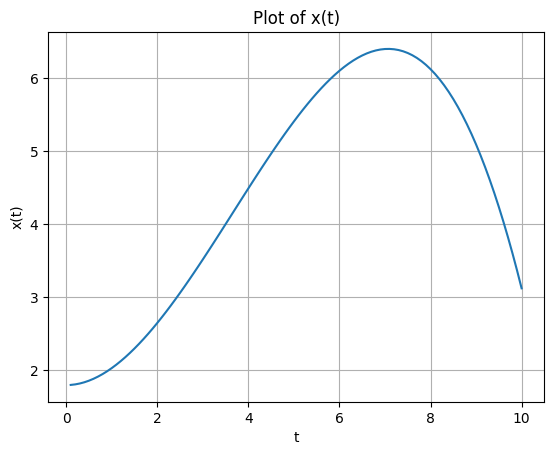

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function x(t)
def x(t):
    c1 = 20  # Assuming c1 = 0
    return c1 - 0.0333333 * (t + 10) * (t**2 - 25*t + 400) + 50 * np.log(t + 10)

# Generate values for t
t_values = np.linspace(0.1, 10, 100)  # Avoiding t = -10 for logarithm

# Calculate corresponding x values
x_values = x(t_values)

# Plot
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Plot of x(t)')
plt.grid(True)
plt.show()


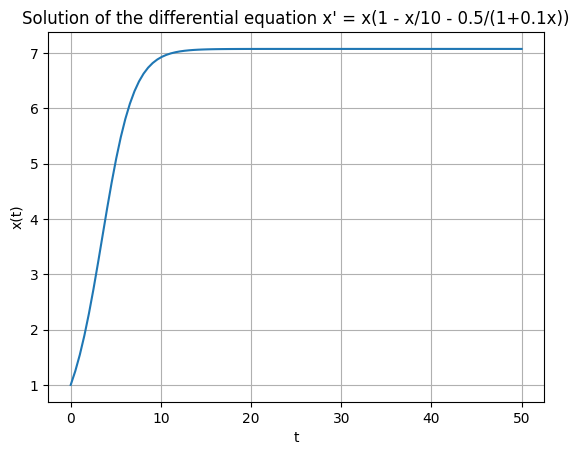

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the model
def model(x, t):
    dxdt = x * (1 - x/10 - 0.5/(1 + 0.1*x))
    return dxdt

# Initial condition
x0 = 1  # Initial value of x

# Time points
t = np.linspace(0, 50, 100)  # Adjust time range as needed

# Solve the differential equation
x = odeint(model, x0, t)

# Plot the solution
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution of the differential equation x\' = x(1 - x/10 - 0.5/(1+0.1x))')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the periodic differential equation
def periodic_model(x, t):
    dxdt = x * (1 - (x / (1 + 0.2 * np.sin(t))) - (2.06 + np.cos(t)) / (1 + (16.6 + np.sin(t)) * x))
    return dxdt

# Generate synthetic data
t = np.linspace(0, 100, 2000)
initial_condition = 1.0
true_solution = odeint(periodic_model, initial_condition, t)

# Embed periodicity in the input features
input_features = np.column_stack([t, np.sin(t), np.cos(t)])

# Generate sample training points
sample_indices = np.random.choice(len(t), size=100, replace=False)
sample_t = t[sample_indices]
sample_true_solution = true_solution[sample_indices]

# Define the neural network model with periodic features
model_nn_periodic = models.Sequential([
    layers.Dense(20, activation='relu', input_shape=(3,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    # layers.Dense(20, activation='relu'),
    # layers.Dense(20, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model_nn_periodic.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network to approximate the periodic solution
history_periodic = model_nn_periodic.fit(input_features, true_solution, epochs=200, verbose=0)

# Use the trained model to predict the periodic solution
predicted_solution_periodic = model_nn_periodic.predict(input_features)

# Store sample data points in a DataFrame
sample_data_df = pd.DataFrame({'Time': sample_t, 'True Solution': sample_true_solution.flatten()})

# Store loss values in a DataFrame
loss_df = pd.DataFrame({'Epoch': history_periodic.epoch, 'Loss': history_periodic.history['loss']})
# Plot the true periodic solution, predicted periodic solution, sample data points, and loss curve during training
fig_periodic = go.Figure()

# Plot the true periodic solution
fig_periodic.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))

# Plot the predicted periodic solution
fig_periodic.add_trace(go.Scatter(x=t, y=predicted_solution_periodic.flatten(), mode='lines', name='Predicted Solution'))

# Plot the sample data points
fig_periodic.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Data Points'))

# Plot the loss curve during training
fig_loss_periodic = go.Figure()
fig_loss_periodic.add_trace(go.Scatter(x=history_periodic.epoch, y=history_periodic.history['loss'], mode='lines', name='Training Loss'))
fig_loss_periodic.update_layout(title='Training Loss Curve',
                                xaxis_title='Epoch',
                                yaxis_title='Loss')

fig_periodic.show()
fig_loss_periodic.show()


63/63 [==============================] - 0s 1ms/step


In [2]:
# Compute the loss function
def loss(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))
# Compute the loss function for the neural network solution
nn_loss = loss(predicted_solution_periodic, true_solution)
# Print the loss functions
print('Loss function for neural network solution:', nn_loss)

Loss function for neural network solution: 8.077882611424438e-06


In [ ]:
# # Define the Runge-Kutta method
# def runge_kutta(x, t, h):
#   k1 = h * f(x, t)
#   k2 = h * f(x + k1 / 2, t + h / 2)
#   k3 = h * f(x + k2 / 2, t + h / 2)
#   k4 = h * f(x + k3, t + h)
#   return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# # Simulate the differential equation using the Runge-Kutta method 2000 times
# t_span = np.linspace(0, 100, 2000)
# x_rk = np.zeros((20, len(t_span)))
# for i in range(20):
#   x_rk[i, 0] = 1
#   for j in range(len(t_span) - 1):
#     x_rk[i, j + 1] = runge_kutta(x_rk[i, j], t_span[j], t_span[1] - t_span[0])

# # Compute the loss function for each simulation
# loss_rk = np.zeros(2000)
# for i in range(2000):
#   loss_rk[i] = loss(x_rk[i, :], true_solution)

# # Create a dataframe to store the loss functions
# rkloss_df = pd.DataFrame({'Loss function': loss_rk})

In [ ]:
# simulation_index = 0
# # Plot the true periodic solution, predicted periodic solution, sample data points, and loss curve during training
# fig_periodic = go.Figure()

# # Plot the true periodic solution
# fig_periodic.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))

# # Plot the predicted periodic solution
# fig_periodic.add_trace(go.Scatter(x=t, y=predicted_solution_periodic.flatten(), mode='lines', name='Predicted Solution'))

# # Plot the sample data points
# fig_periodic.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Data Points'))
# fig_periodic.add_trace(go.Scatter(x=t_span, y=x_rk[simulation_index, :], name='RK Simulation'.format(simulation_index)))
# # Plot the loss curve during training
# fig_loss_periodic = go.Figure()
# fig_loss_periodic.add_trace(go.Scatter(x=history_periodic.epoch, y=history_periodic.history['loss'], mode='lines', name='Training Loss'))
# fig_loss_periodic.add_trace(go.Scatter(x=history_periodic.epoch, y =rkloss_df['Loss function'], mode='lines', name='Training Loss'))
# fig_loss_periodic.update_layout(title='Training Loss Curve',
#                                 xaxis_title='Epoch',
#                                 yaxis_title='Loss')

# fig_periodic.show()
# fig_loss_periodic.show()

In [ ]:
# Define the differential equation
def f(x, t):
  return x * (1 - (x / (1 + 0.2 * np.sin(t))) - (2.06 + np.cos(t)) / (1 + (16.6 + np.sin(t)) * x))

# Define the Runge-Kutta method
def runge_kutta(x, t, h):
  k1 = h * f(x, t)
  k2 = h * f(x + k1 / 2, t + h / 2)
  k3 = h * f(x + k2 / 2, t + h / 2)
  k4 = h * f(x + k3, t + h)
  return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Simulate the differential equation using the Runge-Kutta method
t_span = np.linspace(0, 100, 2000)
x_rk = np.zeros_like(t_span)
x_rk[0] = 1
for i in range(len(t_span) - 1):
  x_rk[i + 1] = runge_kutta(x_rk[i], t_span[i], t_span[1] - t_span[0])

# Compute the loss function
def loss(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

# Compute the loss function for the neural network solution
nn_loss = loss(predicted_solution_periodic, true_solution)

# Compute the loss function for the Runge-Kutta solution
rk_loss = loss(x_rk, true_solution)

# Print the loss functions
print('Loss function for neural network solution:', nn_loss)
print('Loss function for Runge-Kutta solution:', rk_loss)


NameError: name 'predicted_solution_periodic' is not defined

In [ ]:
# Define the Runge-Kutta method
def runge_kutta(x, t, h):
  k1 = h * f(x, t)
  k2 = h * f(x + k1 / 2, t + h / 2)
  k3 = h * f(x + k2 / 2, t + h / 2)
  k4 = h * f(x + k3, t + h)
  return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Simulate the differential equation using the Runge-Kutta method 2000 times
t_span = np.linspace(0, 100, 2000)
x_rk = np.zeros((20, len(t_span)))
for i in range(20):
  x_rk[i, 0] = 1
  for j in range(len(t_span) - 1):
    x_rk[i, j + 1] = runge_kutta(x_rk[i, j], t_span[j], t_span[1] - t_span[0])

# Compute the loss function for each simulation
loss_rk = np.zeros(20)
for i in range(20):
  loss_rk[i] = loss(x_rk[i, :], true_solution)

# Create a dataframe to store the loss functions
rkloss_df = pd.DataFrame({'Loss function': loss_rk})

In [ ]:
rkloss_df

In [ ]:
simulation_index = 0
# Plot the true periodic solution, predicted periodic solution, sample data points, and loss curve during training
fig_periodic = go.Figure()

# Plot the true periodic solution
fig_periodic.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))

# Plot the predicted periodic solution
fig_periodic.add_trace(go.Scatter(x=t, y=predicted_solution_periodic.flatten(), mode='lines', name='Predicted Solution'))

# Plot the sample data points
fig_periodic.add_trace(go.Scatter(x=sample_t, y=sample_true_solution.flatten(), mode='markers', name='Sample Data Points'))
fig_periodic.add_trace(go.Scatter(x=t_span, y=x_rk[simulation_index, :], name='RK Simulation'.format(simulation_index)))
# Plot the loss curve during training
fig_loss_periodic = go.Figure()
fig_loss_periodic.add_trace(go.Scatter(x=history_periodic.epoch, y=history_periodic.history['loss'], mode='lines', name='NN Loss'))
fig_loss_periodic.add_trace(go.Scatter(x=history_periodic.epoch, y =rkloss_df['Loss function'], mode='lines', name='RK Loss'))
fig_loss_periodic.update_layout(title='Loss Curve',
                                xaxis_title='Epoch',
                                yaxis_title='Loss')

fig_periodic.show()
fig_loss_periodic.show()

In [ ]:
sample_data_df

In [ ]:
loss_df

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3,)),
    tf.keras.layers.Dense(20, activation='relu', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(20, activation='relu', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(1, activation='relu', name='Output_Layer')
])

# Save a visualization of the model
plot_model(model, to_file='model_visualization.png', show_shapes=True)

In [ ]:
from graphviz import Digraph
from PIL import Image
import IPython.display as display

# Create a Digraph object
dot = Digraph(comment='Neural Network', format='png')

# Add nodes for parameters
dot.node('param1', 'Parameter 1')
dot.node('param2', 'Parameter 2')
# Add additional parameter nodes as needed...

# Add nodes for input layer
dot.node('t', 't')
dot.node('sint', 'sin(t)')
dot.node('cost', 'cos(t)')

# Add nodes for the first hidden layer
for i in range(1, 21):
    dot.node(f'h1_{i}', f'Hidden Layer 1 Neuron {i}')

# Add nodes for the second hidden layer
for i in range(1, 21):
    dot.node(f'h2_{i}', f'Hidden Layer 2 Neuron {i}')

# Add node for output layer
dot.node('out', 'Output Neuron')

# Add edges connecting nodes
for param_node in ['param1', 'param2']:
    for i in range(1, 21):
        dot.edge(param_node, f'h1_{i}')

for i in range(1, 21):
    dot.edge('t', f'h1_{i}')
    dot.edge('sint', f'h1_{i}')
    dot.edge('cost', f'h1_{i}')

for i in range(1, 21):
    dot.edge(f'h1_{i}', f'h2_{i}')

for i in range(1, 21):
    dot.edge(f'h2_{i}', 'out')

# Save the graph to a PNG file
dot.render('neural_network_graph', format='png', cleanup=True)

# Display the generated image
img = Image.open('neural_network_graph.png')
display.display(img)


In [ ]:
# from graphviz import Digraph
# from PIL import Image
# import IPython.display as display

# # Create a Digraph object
# dot = Digraph(comment='Neural Network', format='png')

# # Add nodes for input layer
# dot.node('t', 't')
# dot.node('sint', 'sin(t)')
# dot.node('cost', 'cos(t)')

# # Add nodes for hidden layer
# dot.node('h1', 'Hidden Neuron 1')
# dot.node('h2', 'Hidden Neuron 2')
# dot.node('h3', 'Hidden Neuron 3')
# # Add additional neurons as needed...

# # Add node for output layer
# dot.node('out', 'Output Neuron')

# # Add edges connecting nodes
# dot.edge('t', 'h1')
# dot.edge('sint', 'h1')
# dot.edge('cost', 'h1')

# dot.edge('t', 'h2')
# dot.edge('sint', 'h2')
# dot.edge('cost', 'h2')

# dot.edge('t', 'h3')
# dot.edge('sint', 'h3')
# dot.edge('cost', 'h3')

# # Add additional edges as needed...

# # Save the graph to a PNG file
# dot.render('neural_network_graph', format='png', cleanup=True)

# # Display the generated image
# img = Image.open('neural_network_graph.png')
# display.display(img)


In [ ]:
# from graphviz import Digraph
# from PIL import Image
# import IPython.display as display

# # Create a Digraph object
# dot = Digraph(comment='Neural Network', format='png')

# # Add nodes for input layer
# dot.node('t', 't')
# dot.node('sint', 'sin(t)')
# dot.node('cost', 'cos(t)')

# # Add nodes for hidden layer
# for i in range(1, 21):
#     dot.node(f'h{i}', f'Hidden Neuron {i}')

# # Add node for output layer
# dot.node('out', 'Output Neuron')

# # Add edges connecting nodes
# for i in range(1, 21):
#     dot.edge('t', f'h{i}')
#     dot.edge('sint', f'h{i}')
#     dot.edge('cost', f'h{i}')

# dot.edge('h1', 'out')
# dot.edge('h2', 'out')
# # Add additional edges as needed...

# # Save the graph to a PNG file
# dot.render('neural_network_graph', format='png', cleanup=True)

# # Display the generated image
# img = Image.open('neural_network_graph.png')
# display.display(img)


In [ ]:
# from graphviz import Digraph
# from PIL import Image
# import IPython.display as display

# # Create a Digraph object
# dot = Digraph(comment='Neural Network', format='png')

# # Add nodes for parameters
# dot.node('param1', 'Parameter 1')
# dot.node('param2', 'Parameter 2')
# # Add additional parameter nodes as needed...

# # Add nodes for input layer
# dot.node('t', 't')
# dot.node('sint', 'sin(t)')
# dot.node('cost', 'cos(t)')

# # Add nodes for hidden layer
# for i in range(1, 21):
#     dot.node(f'h{i}', f'Hidden Neuron {i}')

# # Add node for output layer
# dot.node('out', 'Output Neuron')

# # Add edges connecting nodes
# for param_node in ['param1', 'param2']:
#     for i in range(1, 21):
#         dot.edge(param_node, f'h{i}')

# for i in range(1, 21):
#     dot.edge('t', f'h{i}')
#     dot.edge('sint', f'h{i}')
#     dot.edge('cost', f'h{i}')

# dot.edge('h1', 'out')
# dot.edge('h2', 'out')
# # Add additional edges as needed...

# # Save the graph to a PNG file
# dot.render('neural_network_graph', format='png', cleanup=True)

# # Display the generated image
# img = Image.open('neural_network_graph.png')
# display.display(img)


In [ ]:
pip install tabulate


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the differential equation
def f(x, t):
    return x * (1 - (x / (1 + 0.2 * np.sin(t))) - (2.06 + np.cos(t)) / (1 + (16.6 + np.sin(t)) * x))

# Define the Runge-Kutta method
def runge_kutta(x, t, h):
    k1 = h * f(x, t)
    k2 = h * f(x + k1 / 2, t + h / 2)
    k3 = h * f(x + k2 / 2, t + h / 2)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Simulate the differential equation using the Runge-Kutta method
t_span = np.linspace(0, 100, 2000)
x_rk = np.zeros_like(t_span)
x_rk[0] = 1
for i in range(len(t_span) - 1):
    x_rk[i + 1] = runge_kutta(x_rk[i], t_span[i], t_span[1] - t_span[0])

# Compute the loss function
def loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Compute the loss function for the neural network solution
nn_loss = loss(predicted_solution_periodic, true_solution)

# Compute the loss function for the Runge-Kutta solution
rk_loss = loss(x_rk, true_solution)

# Display the RK loss and PINN loss in tabular form
import pandas as pd

# Create a DataFrame for the loss values
loss_data = {
    'Method': ['Runge-Kutta', 'Physics-Informed Neural Network'],
    'Loss': [rk_loss, nn_loss]
}

loss_table = pd.DataFrame(loss_data)

# Display the table
print(loss_table)

# Rest of your code for plotting and visualization
# ...


                            Method      Loss
0                      Runge-Kutta  0.018194
1  Physics-Informed Neural Network  0.000002


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the differential equation using TensorFlow operations
def model(x, t):
    dxdt = x * (1 - (x / (1 + 0.2 * tf.sin(t))) - (2.06 + tf.cos(t)) / (1 + (16.6 + tf.sin(t)) * x))
    return dxdt

# Generate synthetic data
t = np.linspace(0, 1000, 1000)
initial_condition = 1.0
true_solution = odeint(model, initial_condition, t)

# Convert `t` to a TensorFlow tensor with the appropriate data type
t_tensor = tf.convert_to_tensor(t, dtype=tf.float32)

# Define the neural network model
model_nn = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

# Define custom loss function incorporating physics loss
def custom_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))

    # Compute the residual of the differential equation as the physics loss
    def model_residual(y, t):
        dxdt_pred = model(y, t)
        # Compute the derivative of dxdt_pred with respect to t manually
        dt = t[1] - t[0]
        dxdt_pred_derivative = (dxdt_pred[1:] - dxdt_pred[:-1]) / dt
        # Flatten the derivative tensor to convert it into a 1D tensor
        dxdt_pred_derivative_flat = tf.reshape(dxdt_pred_derivative, [-1])
        # Pad the derivative with zeros to match the shape of dxdt_pred
        dxdt_pred_derivative_padded = tf.pad(dxdt_pred_derivative_flat, [[0, 1]])
        return tf.gradients(y, t)[0] - dxdt_pred_derivative_padded

    physics_loss = tf.reduce_mean(tf.square(model_residual(y_pred, t_tensor)))

    return mse_loss + physics_loss

# Compile the model with custom loss
model_nn.compile(optimizer='adam', loss=custom_loss)

# Train the neural network to approximate the solution
model_nn.fit(t, true_solution, epochs=10000, verbose=0)

# Use the trained model to predict the solution
predicted_solution = model_nn.predict(t)

# Plot the results using Plotly
fig = go.Figure()

# Plot the true solution
fig.add_trace(go.Scatter(x=t, y=true_solution.flatten(), mode='lines', name='True Solution'))

# Plot the neural network predicted solution
fig.add_trace(go.Scatter(x=t, y=predicted_solution.flatten(), mode='lines', name='Predicted Solution'))

fig.update_layout(title='Differential Equation Solution using Neural Network',
                  xaxis_title='Time (t)',
                  yaxis_title='Solution (x)')

fig.show()


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "<ipython-input-9-684e575362c0>", line 40, in model_residual  *
        return tf.gradients(y, t)[0] - dxdt_pred_derivative_padded

    ValueError: None values not supported.


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the system of differential equations
def system_model(variables, t):
    x, y = variables
    dxdt = x * ((4+ (1/2) * np.sin(t))/(1+(3 + (1/2) * np.cos(t)) * y)- (1 + (1/4) * np.cos(t)) * x - (1 + (1/5) * np.cos(t)) * y/((3/5) + (27/100) * np.sin(t) + ((3/10)+(1/2) * np.sin(t)) * x + ((1/2)+(1/10) * np.sin(t)) * y + (2+(3/10) * np.sin(t)) * x * y))
    dydt = y * (-((3/5) + (1/2) * np.cos(t))  - (3 + (3.2) * np.cos(t)) * y  + (2 + np.cos(t)) * x /((3/5) + (27/100) * np.sin(t) + ((3/10)+(1/2) * np.sin(t)) * x + ((1/2)+(1/10) * np.sin(t)) * y + (2+(3/10) * np.sin(t)) * x * y)   )
    return [dxdt, dydt]

# Generate synthetic data
t = np.linspace(0, 100, 2000)
initial_conditions = [1.5, 0.5]
# a = 0.091
# b = 0.061
true_solution_system = odeint(system_model, initial_conditions, t)
# Define input features
input_features = np.column_stack([t, np.sin(t), np.cos(t)])
# Generate sample training points
sample_indices = np.random.choice(len(t), size=100, replace=False)
sample_t = t[sample_indices]
sample_true_solution_system = true_solution_system[sample_indices]

# Define the neural network model for the system
model_system = models.Sequential([
    layers.Dense(50, activation='relu', input_shape=(2,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(2)  # Output two values for x and y
])

# Compile the model
model_system.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network to approximate the system solution
history_system = model_system.fit(true_solution_system[:-1], true_solution_system[1:], epochs=2000, verbose=0)

# Use the trained model to predict the system solution
predicted_solution_system = model_system.predict(true_solution_system[:-1])

# Store loss values in a DataFrame
loss_df_system = pd.DataFrame({'Epoch': history_system.epoch, 'Loss': history_system.history['loss']})

# Plot the true system solution, predicted system solution, and loss curve during training
fig_system2 = go.Figure()
fig_system3 = go.Figure()
# Plot the true system solution
fig_system2.add_trace(go.Scatter(x=t, y=true_solution_system[:, 0], mode='lines', name='True Solution x'))
fig_system3.add_trace(go.Scatter(x=t, y=true_solution_system[:, 1], mode='lines', name='True Solution y'))

# Plot the predicted system solution
fig_system2.add_trace(go.Scatter(x=t[:-1], y=predicted_solution_system[:, 0], mode='lines', name='Predicted Solution x'))
fig_system3.add_trace(go.Scatter(x=t[:-1], y=predicted_solution_system[:, 1], mode='lines', name='Predicted Solution y'))

# Plot the loss curve during training
fig_loss_system = go.Figure()
fig_loss_system.add_trace(go.Scatter(x=history_system.epoch, y=history_system.history['loss'], mode='lines', name='Training Loss'))
fig_loss_system.update_layout(title='Training Loss Curve',
                              xaxis_title='Epoch',
                              yaxis_title='Loss')

fig_system1 = go.Figure()
fig_system1.add_trace(go.Scatter3d(x=true_solution_system[:, 0], y=true_solution_system[:, 1], z=t[:-1], mode='lines', name='True Solution'))

# Plot the predicted system solution
fig_system1.add_trace(go.Scatter3d(x=predicted_solution_system[:, 0], y=predicted_solution_system[:, 1], z=t[:-1], mode='lines', name='Predicted Solution'))
fig_system1.update_layout(
    title='Differential Equation Solution using Neural Network',
    x_title='Solution (x)',
    y_title='Solution (y)',
    z_title='Time (t)'
)

fig_system2.update_layout(
    title='Differential Equation Solution using Neural Network',
    xaxis_title='Time (t)',
    yaxis_title='Solution (x)'
)

fig_system3.update_layout(
    title='Differential Equation Solution using Neural Network',
    xaxis_title='Time (t)',
    yaxis_title='Solution (y)'
)

fig_system1.show()
fig_system2.show()
fig_system3.show()
fig_loss_system.show()


63/63 [==============================] - 0s 1ms/step


ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'x'

Did you mean "geo"?

    Valid properties:
        activeselection
            :class:`plotly.graph_objects.layout.Activeselection`
            instance or dict with compatible properties
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to reduce
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to reduce "opacity" to
            see multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        minreducedheight
            Minimum height of the plot with margin.automargin
            applied (in px)
        minreducedwidth
            Minimum width of the plot with margin.automargin
            applied (in px)
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newselection
            :class:`plotly.graph_objects.layout.Newselection`
            instance or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scattergap
            Sets the gap (in plot fraction) between scatter points
            of adjacent location coordinates. Defaults to `bargap`.
        scattermode
            Determines how scatter points at the same location
            coordinate are displayed on the graph. With "group",
            the scatter points are plotted next to one another
            centered around the shared location. With "overlay",
            the scatter points are plotted over one another, you
            might need to reduce "opacity" to see multiple scatter
            points.
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        selections
            A tuple of
            :class:`plotly.graph_objects.layout.Selection`
            instances or dicts with compatible properties
        selectiondefaults
            When used in a template (as
            layout.template.layout.selectiondefaults), sets the
            default property values to use for elements of
            layout.selections
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to reduce "opacity" to see
            multiple bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "geo"?

Bad property path:
x_title
^

In [ ]:
import plotly.graph_objects as go

# Plot the true system solution, predicted system solution, and loss curve during training
fig_system2 = go.Figure()
fig_system3 = go.Figure()

# Plot the true system solution
fig_system2.add_trace(go.Scatter(x=t, y=true_solution_system[:, 0], mode='lines', name='True Solution x'))
fig_system3.add_trace(go.Scatter(x=t, y=true_solution_system[:, 1], mode='lines', name='True Solution y'))

# Plot the predicted system solution
fig_system2.add_trace(go.Scatter(x=t[:-1], y=predicted_solution_system[:, 0], mode='lines', name='Predicted Solution x'))
fig_system3.add_trace(go.Scatter(x=t[:-1], y=predicted_solution_system[:, 1], mode='lines', name='Predicted Solution y'))

# Plot the loss curve during training
fig_loss_system = go.Figure()
fig_loss_system.add_trace(go.Scatter(x=history_system.epoch, y=history_system.history['loss'], mode='lines', name='Training Loss'))
fig_loss_system.update_layout(title='Training Loss Curve', xaxis_title='Epoch', yaxis_title='Loss')

# Plot the 3D true and predicted system solution
fig_system1 = go.Figure()
fig_system1.add_trace(go.Scatter3d(x=true_solution_system[:, 0], y=true_solution_system[:, 1], z=t[:-1], mode='lines', name='True Solution'))
fig_system1.add_trace(go.Scatter3d(x=predicted_solution_system[:, 0], y=predicted_solution_system[:, 1], z=t[:-1], mode='lines', name='Predicted Solution'))
fig_system1.update_layout(title='Differential Equation Solution using Neural Network',
                          scene=dict(xaxis_title='Solution (x)',
                                     yaxis_title='Solution (y)',
                                     zaxis_title='Time (t)'))

fig_system2.update_layout(title='Differential Equation Solution using Neural Network',
                          xaxis_title='Time (t)',
                          yaxis_title='Solution (x)')

fig_system3.update_layout(title='Differential Equation Solution using Neural Network',
                          xaxis_title='Time (t)',
                          yaxis_title='Solution (y)')

fig_system1.show()
fig_system2.show()
fig_system3.show()
fig_loss_system.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.integrate import odeint
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.optimize import minimize
from scipy.integrate import solve_ivp

# Define parameters
a = 0.1
b = 0.1
c = 0.1
d = 0.1
r = 0.1
D = 0.01

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = np.sin(np.pi * x / L)
v0 = np.cos(np.pi * x / L)
y0 = np.concatenate([u0, v0])

# Define function to compute derivatives
def derivatives(t, y):
    u = y[:Nx]
    v = y[Nx:]

    # Compute spatial derivatives using finite differences
    d2u_dx2 = np.gradient(np.gradient(u, dx), dx)
    d2v_dx2 = np.gradient(np.gradient(v, dx), dx)

    # Compute temporal derivatives
    dudt = a * u - b * u**3 - v + D * d2u_dx2
    dvdt = c * u - v + D * d2v_dx2 + d * u - b * v + r * (1 - u**2) * v

    return np.concatenate([dudt, dvdt])

# Define time span
t_span = (0, 10)

# Solve the system of equations
sol = solve_ivp(derivatives, t_span, y0, method='RK45', t_eval=np.linspace(*t_span, 200))

# Extract solution
u_solution = sol.y[:Nx]
v_solution = sol.y[Nx:]

# Create meshgrid for plotting
X, T = np.meshgrid(x, sol.t)

# Plot using Plotly
fig_u = go.Figure(data=go.Surface(x=X, y=T, z=u_solution, colorscale='Viridis'))
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=go.Surface(x=X, y=T, z=v_solution, colorscale='Viridis'))
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 0.1
b = 0.1
c = 0.1
d = 0.1
r = 0.1
D = 0.01

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = np.sin(np.pi * x / L)
v0 = np.cos(np.pi * x / L)
y0 = np.concatenate([u0, v0])

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Define loss function
def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 0:1]
        du_dt = tape.gradient(u, x_t_tf)[:, 1:2]
        dv_dt = tape.gradient(v, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - D * du_dx - a * u + b * u**3 + v)**2) + \
                    tf.reduce_mean((dv_dt - D * dv_dx - c * u + d * u - b * v + r * (1 - u**2) * v)**2)

    return residual_loss

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)

# Train the model
history = model.fit(x_t_tf, np.zeros((x_t.shape[0], 2)), epochs=1, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)
u_pred = u_pred.reshape((200, 100))
v_pred = v_pred.reshape((200, 100))

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 10, 20))

# Plot using Plotly
fig_u = go.Figure(data=go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis'))
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis'))
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 0.1
b = 0.1
c = 0.1
d = 0.1
r = 0.1
D = 0.01

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = np.sin(np.pi * x / L)
v0 = np.cos(np.pi * x / L)
y0 = np.concatenate([u0, v0])

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Define loss function
def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 0:1]
        du_dt = tape.gradient(u, x_t_tf)[:, 1:2]
        dv_dt = tape.gradient(v, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - D * du_dx - a * u + b * u**3 + v)**2) + \
                    tf.reduce_mean((dv_dt - D * dv_dx - c * u + d * u - b * v + r * (1 - u**2) * v)**2)

    return residual_loss

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)

# Define a callback to record loss history during training
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history_callback = LossHistory()

# Train the model
history = model.fit(x_t_tf, np.zeros((x_t.shape[0], 2)), epochs=10, verbose=1, callbacks=[history_callback])

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Compute true solutions
def solve_pde(u0, v0, a, b, c, d, r, D, dx, dt, Nx, Nt):
    u = np.zeros((Nt, Nx))
    v = np.zeros((Nt, Nx))

    u[0] = u0
    v[0] = v0

    for i in range(1, Nt):
        du_dx = np.gradient(u[i-1], dx)
        dv_dx = np.gradient(v[i-1], dx)

        d2u_dx2 = np.gradient(du_dx, dx)
        d2v_dx2 = np.gradient(dv_dx, dx)

        u[i] = u[i-1] + dt * (D * d2u_dx2 - a * u[i-1] + b * u[i-1]**3 + v[i-1])
        v[i] = v[i-1] + dt * (D * d2v_dx2 - c * u[i-1] + d * u[i-1] - b * v[i-1] + r * (1 - u[i-1]**2) * v[i-1])

    return u, v

true_solutions = np.array([true_solution(t, x) for t in np.linspace(0, 10, 20)])

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 10, 20))

# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=true_solutions[:, 0, :], colorscale='Viridis', opacity=0.7, name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=true_solutions[:, 1, :], colorscale='Viridis', opacity=0.7, name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()

# Plot loss curve using Plotly
fig_loss = go.Figure(data=go.Scatter(x=np.arange(1, len(history_callback.losses) + 1), y=history_callback.losses))
fig_loss.update_layout(title='Training Loss Curve', xaxis_title='Epoch', yaxis_title='Loss')

fig_loss.show()


Epoch 1/10
63/63 [==============================] - 3s 17ms/step - loss: 0.4576 - output_1_loss: 0.2288 - output_2_loss: 0.2288
Epoch 2/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0099 - output_1_loss: 0.0050 - output_2_loss: 0.0050
Epoch 3/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0064 - output_1_loss: 0.0032 - output_2_loss: 0.0032
Epoch 4/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0048 - output_1_loss: 0.0024 - output_2_loss: 0.0024
Epoch 5/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0039 - output_1_loss: 0.0020 - output_2_loss: 0.0020
Epoch 6/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0032 - output_1_loss: 0.0016 - output_2_loss: 0.0016
Epoch 7/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0026 - output_1_loss: 0.0013 - output_2_loss: 0.0013
Epoch 8/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0019 - output_1_loss: 9.3945e

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 0.1
b = 0.1
c = 0.1
d = 0.1
r = 0.1
D = 0.01

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = np.sin(np.pi * x / L)
v0 = np.cos(np.pi * x / L)

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Normalize the input data
x_mean = np.mean(x_t, axis=0)
x_std = np.std(x_t, axis=0)
x_t_normalized = (x_t - x_mean) / x_std

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Define loss function
def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 0:1]
        du_dt = tape.gradient(u, x_t_tf)[:, 1:2]
        dv_dt = tape.gradient(v, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - D * du_dx - a * u + b * u**3 + v)**2) + \
                    tf.reduce_mean((dv_dt - D * dv_dx - c * u + d * u - b * v + r * (1 - u**2) * v)**2)

    return residual_loss

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t_normalized, dtype=tf.float32)

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)

# Define a callback to record loss history during training
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history_callback = LossHistory()

# Train the model
history = model.fit(x_t_tf, np.zeros((x_t.shape[0], 2)), epochs=10, verbose=1, callbacks=[history_callback])

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Compute true solutions numerically
def solve_pde(u0, v0, a, b, c, d, r, D, dx, dt, Nx, Nt):
    u = np.zeros((Nt, Nx))
    v = np.zeros((Nt, Nx))

    u[0] = u0
    v[0] = v0

    for i in range(1, Nt):
        du_dx = np.gradient(u[i-1], dx)
        dv_dx = np.gradient(v[i-1], dx)

        d2u_dx2 = np.gradient(du_dx, dx)
        d2v_dx2 = np.gradient(dv_dx, dx)

        u[i] = u[i-1] + dt * (D * d2u_dx2 - a * u[i-1] + b * u[i-1]**3 + v[i-1])
        v[i] = v[i-1] + dt * (D * d2v_dx2 - c * u[i-1] + d * u[i-1] - b * v[i-1] + r * (1 - u[i-1]**2) * v[i-1])

    return u, v

dt = 0.4
Nt = int(10 / dt)
true_solutions_u, true_solutions_v = solve_pde(u0, v0, a, b, c, d, r, D, dx, dt, Nx, Nt)

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 10, 20))

# Plot using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=true_solutions_u, colorscale='Viridis', opacity=0.7, name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=true_solutions_v, colorscale='Viridis', opacity=0.7, name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=np.arange(len(history_callback.losses)), y=history_callback.losses, mode='lines'))
fig_loss.update_layout(title='Training Loss', xaxis_title='Epoch', yaxis_title='Loss')

fig_u.show()
fig_v.show()
fig_loss.show()


In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 0.1
b = 0.1
c = 0.1
d = -0.1
r = 0.0001
D = 0.01

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = (2/(np.pi))*np.sin((np.pi)*x)
v0 = (2/(np.pi))*np.cos((np.pi)*x)
# u0 = 0.1
# v0 = 0.1
# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Compute true solutions
def solve_pde(t, x, u0, v0, a, b, c, d, r, D, dx, dt, Nx):
    u = np.zeros((len(t), len(x)))
    v = np.zeros((len(t), len(x)))

    for i, t_val in enumerate(t):
        if i == 0:
            u[i] = u0
            v[i] = v0
        else:
            du_dx = np.gradient(u[i-1], dx, edge_order=2)
            dv_dx = np.gradient(v[i-1], dx, edge_order=2)

            d2u_dx2 = np.gradient(du_dx, dx, edge_order=2)
            d2v_dx2 = np.gradient(dv_dx, dx, edge_order=2)

            u[i] = u[i-1] + dt * (D * d2u_dx2 - a * u[i-1] + b * u[i-1]**3 + v[i-1])
            v[i] = v[i-1] + dt * (D * d2v_dx2 - c * u[i-1] + d * u[i-1] - b * v[i-1] + r * (1 - u[i-1]**2) * v[i-1])

    return u, v

# Define time step and compute true solutions
dt = 0.05
true_solutions = solve_pde(np.linspace(0, 10, 20), x, u0, v0, a, b, c, d, r, D, dx, dt, Nx)

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 10, 20))

# Extract true solutions for u and v
true_u, true_v = true_solutions

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Define loss function
def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 0:1]
        du_dt = tape.gradient(u, x_t_tf)[:, 1:2]
        dv_dt = tape.gradient(v, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - D * du_dx - a * u + b * u**3 + v)**2) + \
                    tf.reduce_mean((dv_dt - D * dv_dx - c * u + d * u - b * v + r * (1 - u**2) * v)**2)

    return residual_loss



# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)

# Train the model
model.fit(x_t_tf, np.zeros((x_t.shape[0], 2)), epochs=10, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))




# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=true_u, colorscale='Plasma', opacity=0.9, name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=true_v, colorscale='Plasma', opacity=0.9, name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Epoch 1/10
63/63 [==============================] - 5s 17ms/step - loss: 0.0483 - output_1_loss: 0.0242 - output_2_loss: 0.0242
Epoch 2/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0024 - output_1_loss: 0.0012 - output_2_loss: 0.0012
Epoch 3/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0020 - output_1_loss: 0.0010 - output_2_loss: 0.0010
Epoch 4/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0022 - output_1_loss: 0.0011 - output_2_loss: 0.0011
Epoch 5/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0021 - output_1_loss: 0.0010 - output_2_loss: 0.0010
Epoch 6/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0017 - output_1_loss: 8.3160e-04 - output_2_loss: 8.3160e-04
Epoch 7/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0013 - output_1_loss: 6.6594e-04 - output_2_loss: 6.6594e-04
Epoch 8/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0011 - output

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 0.1
b = 0.1
c = 0.1
d = -0.1
r = 0.0001
D = 0.01

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = (1/(np.pi))*np.sin((np.pi)*x)
v0 = (1/(np.pi))*np.cos((np.pi)*x)
# u0 = 0
# v0 = 0
# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Compute true solutions
def solve_pde(t, x, u0, v0, a, b, c, d, r, D, dx, dt, Nx):
    u = np.zeros((len(t), len(x)))
    v = np.zeros((len(t), len(x)))

    for i, t_val in enumerate(t):
        if i == 0:
            u[i] = u0
            v[i] = v0
        else:
            du_dx = np.gradient(u[i-1], dx, edge_order=2)
            dv_dx = np.gradient(v[i-1], dx, edge_order=2)

            d2u_dx2 = np.gradient(du_dx, dx, edge_order=2)
            d2v_dx2 = np.gradient(dv_dx, dx, edge_order=2)

            u[i] = u[i-1] + dt * (D * d2u_dx2 - a * u[i-1] + b * u[i-1]**3 + v[i-1])
            v[i] = v[i-1] + dt * (D * d2v_dx2 - c * u[i-1] + d * u[i-1] - b * v[i-1] + r * (1 - u[i-1]**2) * v[i-1])

    return u, v

# Define time step and compute true solutions
dt = 0.05
true_solutions = solve_pde(np.linspace(0, 10, 20), x, u0, v0, a, b, c, d, r, D, dx, dt, Nx)

# Extract true solutions for u and v
true_u, true_v = true_solutions

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    du_dx = tf.gradients(u_pred, x_t_tf)[0]
    dv_dx = tf.gradients(v_pred, x_t_tf)[0]

    du_dt = tf.gradients(u_pred, x_t_tf[:, 1])[0]
    dv_dt = tf.gradients(v_pred, x_t_tf[:, 1])[0]

    # Check and handle None gradients
    if du_dx is None:
        du_dx = tf.zeros_like(u_pred)
    if dv_dx is None:
        dv_dx = tf.zeros_like(v_pred)
    if du_dt is None:
        du_dt = tf.zeros_like(u_pred[:, :1])
    if dv_dt is None:
        dv_dt = tf.zeros_like(v_pred[:, :1])

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - D * du_dx - a * u_pred + b * u_pred**3 + v_pred)**2) + \
                    tf.reduce_mean((dv_dt - D * dv_dx - c * u_pred + d * u_pred - b * v_pred + r * (1 - u_pred**2) * v_pred)**2)

    return residual_loss






# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)


# Train the model
model.fit(x_t_tf, (true_u.reshape(-1, 1), true_v.reshape(-1, 1)), epochs=100, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=x, y=np.linspace(0, 10, 20), z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=x, y=np.linspace(0, 10, 20), z=true_u, colorscale='Plasma', opacity=0.9, name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=x, y=np.linspace(0, 10, 20), z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=x, y=np.linspace(0, 10, 20), z=true_v, colorscale='Plasma', opacity=0.9, name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 9/100
63/63 [=============================

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define the PINN architecture
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(2)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

# Define the loss function incorporating the PDEs and boundary conditions
def loss(model, x, t):
    with tf.GradientTape() as tape:
        tape.watch([x, t])
        u, v = tf.split(model(tf.concat([x, t], axis=1)), 2, axis=1)
        du_dt = tape.gradient(u, t)
        dv_dt = tape.gradient(v, t)

    print("Shapes:")
    print("u shape:", u.shape)
    print("v shape:", v.shape)
    print("du_dt shape:", du_dt.shape)
    print("dv_dt shape:", dv_dt.shape)

    pde1 = du_dt - u - v + tf.sin(x) * tf.sin(t)
    pde2 = dv_dt - u - v + tf.cos(x) * tf.cos(t)

    return tf.reduce_mean(tf.square(pde1)) + tf.reduce_mean(tf.square(pde2))





# Generate training data
def generate_training_data(n_samples):
    x = np.random.uniform(-np.pi, np.pi, n_samples).reshape(-1, 1)
    t = np.random.uniform(0, 2*np.pi, n_samples).reshape(-1, 1)
    return x, t

# Training function
def train(model, optimizer, x, t, epochs):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss_value = loss(model, x, t)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        if epoch % 100 == 0:
            print("Epoch {}: Loss = {}".format(epoch, loss_value))

# Generate test data for plotting
x_test = np.linspace(-np.pi, np.pi, 100)
t_test = np.linspace(0, 2*np.pi, 100)
X_test, T_test = np.meshgrid(x_test, t_test)

# Create PINN model and optimizer
model = PINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Generate training data
n_samples = 1000
x_train, t_train = generate_training_data(n_samples)

# Train the model
epochs = 5000
train(model, optimizer, x_train, t_train, epochs)

# Predict solutions
u_pred, v_pred = tf.split(model(tf.concat([X_test.reshape(-1, 1), T_test.reshape(-1, 1)], axis=1)), 2, axis=1)
U_pred = u_pred.numpy().reshape(X_test.shape)
V_pred = v_pred.numpy().reshape(X_test.shape)

# True solutions
U_true = np.sin(X_test) * np.sin(T_test)
V_true = np.cos(X_test) * np.cos(T_test)

# Plot solutions
fig = go.Figure()

# True solutions
fig.add_trace(go.Surface(x=x_test, y=t_test, z=U_true, name='True u(x,t)'))
fig.add_trace(go.Surface(x=x_test, y=t_test, z=V_true, name='True v(x,t)', showscale=False))

# Predicted solutions
fig.add_trace(go.Surface(x=x_test, y=t_test, z=U_pred, name='Predicted u(x,t)', showscale=False))
fig.add_trace(go.Surface(x=x_test, y=t_test, z=V_pred, name='Predicted v(x,t)', showscale=False))

fig.update_layout(title='True and Predicted Solutions',
                  scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='Value'))

fig.show()



ValueError: Passed in object [[ 1.87235938e-01]
 [ 2.45269176e-01]
 [-2.12675457e+00]
 [ 1.43683474e+00]
 [ 5.22892203e-02]
 [ 6.41441841e-01]
 [ 2.96157027e+00]
 [-1.43412752e+00]
 [-1.95699864e+00]
 [ 1.61155332e+00]
 [-3.14942785e-01]
 [ 1.68513380e+00]
 [ 1.80786671e-01]
 [-1.74053650e+00]
 [ 8.09157051e-01]
 [-1.08526692e+00]
 [-9.24522751e-01]
 [-3.98314538e-01]
 [-5.99716160e-01]
 [ 1.46320800e+00]
 [-1.75869125e+00]
 [ 2.35307399e+00]
 [ 2.24227813e+00]
 [-2.20436663e+00]
 [-1.83300025e+00]
 [ 2.84014727e+00]
 [-3.81983995e-01]
 [-9.14111369e-02]
 [-8.06814195e-01]
 [-1.99322513e+00]
 [-2.69450037e+00]
 [ 3.84422780e-01]
 [-2.55940701e+00]
 [ 7.74689226e-01]
 [-1.12570263e-01]
 [ 2.98330177e+00]
 [ 4.91670077e-02]
 [ 2.60297487e+00]
 [ 2.92034815e+00]
 [-1.19728065e+00]
 [-1.21769748e+00]
 [ 1.84814778e+00]
 [-2.04969024e+00]
 [-2.53635316e+00]
 [ 1.12426397e-01]
 [-2.61949360e+00]
 [ 3.07981679e+00]
 [-6.42491561e-01]
 [ 2.14831175e+00]
 [ 1.16033660e+00]
 [-1.57063663e+00]
 [-8.04227446e-02]
 [-1.94840362e+00]
 [ 6.55053597e-01]
 [ 4.64415636e-01]
 [ 2.89954265e+00]
 [ 2.02962986e+00]
 [ 1.60172404e+00]
 [ 2.84413348e+00]
 [-2.51248963e+00]
 [ 2.71326452e+00]
 [-6.77438099e-01]
 [-2.59184477e+00]
 [ 2.68926413e+00]
 [ 3.05176753e+00]
 [ 2.52096192e+00]
 [-2.79347004e-01]
 [ 2.82984919e+00]
 [-4.80802702e-01]
 [-1.13627406e+00]
 [ 1.17994929e+00]
 [-2.88800058e+00]
 [-3.31546694e-01]
 [ 2.52422141e+00]
 [ 2.99270807e+00]
 [ 2.31596221e+00]
 [ 2.68774067e+00]
 [ 1.43875409e+00]
 [ 1.19269101e+00]
 [ 1.33779197e+00]
 [ 1.91068936e+00]
 [ 1.60551176e+00]
 [ 2.72722515e+00]
 [ 1.87008984e-01]
 [ 1.30812587e-01]
 [-2.21258308e-01]
 [ 2.60967269e+00]
 [-1.72070140e+00]
 [ 3.02111652e-01]
 [-2.72504203e+00]
 [ 1.54192625e+00]
 [ 1.59499923e+00]
 [-2.39998956e+00]
 [ 1.64941204e+00]
 [-2.26068513e+00]
 [ 2.49173156e+00]
 [ 2.28548522e+00]
 [-5.17084712e-01]
 [-2.77729696e+00]
 [ 2.36320570e+00]
 [-1.54178058e+00]
 [ 2.75970658e+00]
 [ 6.17581046e-01]
 [ 1.99408641e-01]
 [ 8.74270324e-01]
 [ 2.14668468e+00]
 [ 2.84489342e+00]
 [ 1.32506749e+00]
 [ 2.60863784e-02]
 [ 5.19179508e-01]
 [ 2.38611595e+00]
 [-2.54600518e+00]
 [ 1.94124479e+00]
 [-2.25354228e-01]
 [ 1.65003505e+00]
 [-1.43171144e+00]
 [-1.62816206e+00]
 [-1.32027962e+00]
 [-2.26901701e-01]
 [ 1.76142657e+00]
 [-1.46876380e+00]
 [ 1.14497813e+00]
 [ 2.51847552e+00]
 [ 1.28829716e+00]
 [-2.35887418e+00]
 [ 2.66639467e+00]
 [-2.47897860e-01]
 [ 1.66586952e+00]
 [-9.45421337e-01]
 [-7.80018288e-03]
 [-3.40963829e-01]
 [ 1.08785814e+00]
 [ 1.68616473e+00]
 [ 9.75094341e-02]
 [-9.86506044e-01]
 [-1.95277058e+00]
 [ 2.71027074e+00]
 [ 1.43119792e+00]
 [-2.58634845e+00]
 [ 2.26705920e+00]
 [-6.81339735e-01]
 [ 5.39012461e-01]
 [ 2.48466230e+00]
 [ 2.61948723e-01]
 [ 4.00531936e-01]
 [-4.34271854e-01]
 [ 2.11294840e+00]
 [ 2.24776416e+00]
 [ 1.07839097e+00]
 [ 1.72333184e+00]
 [ 1.63766680e+00]
 [-5.32757463e-01]
 [-2.58675309e+00]
 [-1.39293339e+00]
 [ 1.57180526e+00]
 [-2.12427515e+00]
 [ 2.33145665e+00]
 [-1.92998600e+00]
 [-4.20559796e-01]
 [-1.25380002e+00]
 [ 1.14852656e+00]
 [ 8.82411748e-01]
 [-2.78677407e-01]
 [ 5.51025897e-01]
 [-2.41071586e+00]
 [ 2.90625382e+00]
 [ 2.47241492e+00]
 [-2.59593141e+00]
 [-1.99355247e+00]
 [ 1.37602175e+00]
 [-3.09146075e+00]
 [ 2.03690761e+00]
 [-2.88303158e+00]
 [-5.79656056e-01]
 [ 7.27742536e-04]
 [-1.37598432e+00]
 [ 5.52674072e-01]
 [-1.13467305e+00]
 [ 4.96038369e-04]
 [ 2.23216263e+00]
 [ 1.96029132e+00]
 [ 2.63727147e+00]
 [-9.45375707e-01]
 [ 1.64427065e+00]
 [ 5.67206939e-01]
 [ 2.41951374e+00]
 [-6.53538894e-01]
 [-1.80977292e+00]
 [-2.50561461e+00]
 [ 4.73966395e-01]
 [ 2.42704723e-01]
 [ 2.23851064e-01]
 [ 3.02537389e+00]
 [ 1.15858757e+00]
 [-7.68632514e-01]
 [ 1.13189337e+00]
 [-1.09303477e+00]
 [-1.48438886e+00]
 [-5.02534779e-01]
 [-1.93490208e+00]
 [-8.51533999e-01]
 [-2.64566587e+00]
 [-1.74666173e+00]
 [ 9.24125406e-01]
 [ 9.93425124e-03]
 [ 1.59266927e+00]
 [-1.42139281e+00]
 [ 2.26046263e-01]
 [-4.47618847e-01]
 [-7.44836649e-01]
 [-2.09834108e+00]
 [-3.97399003e-01]
 [-6.21294840e-01]
 [-1.62975484e+00]
 [-6.44811338e-01]
 [ 3.74067560e-01]
 [ 2.09733842e+00]
 [-1.40196491e-02]
 [-2.59848435e+00]
 [-3.69694138e-01]
 [-3.07478253e+00]
 [ 2.71322264e+00]
 [-1.68231126e+00]
 [-7.35690907e-01]
 [-1.43469357e+00]
 [ 2.88417588e+00]
 [-1.80603202e+00]
 [ 1.17051788e+00]
 [ 1.53957836e+00]
 [ 1.13888523e+00]
 [ 2.77023946e+00]
 [ 8.18085980e-01]
 [-3.67892973e-01]
 [-2.24298555e+00]
 [ 1.82945910e+00]
 [ 2.44469661e+00]
 [ 1.96360550e+00]
 [ 1.94244010e+00]
 [ 1.35512900e+00]
 [-2.74027139e+00]
 [ 2.55418658e+00]
 [ 1.06584655e+00]
 [-3.72171433e-01]
 [-7.90432510e-01]
 [ 1.13297470e+00]
 [ 2.90980263e+00]
 [ 6.27140947e-02]
 [-3.85348611e-01]
 [ 1.47669176e+00]
 [ 1.94719748e+00]
 [ 2.04921889e+00]
 [ 2.69508257e+00]
 [-1.87200366e+00]
 [-2.34144928e+00]
 [-4.14490754e-01]
 [ 1.30861045e+00]
 [ 8.77270891e-01]
 [ 5.36541564e-02]
 [ 1.35731698e+00]
 [ 5.67198493e-01]
 [ 3.05714694e+00]
 [ 3.09844495e+00]
 [ 2.50337261e+00]
 [ 3.74063642e-01]
 [ 1.74056566e+00]
 [-5.94091784e-02]
 [ 2.32636314e+00]
 [ 9.50266592e-01]
 [ 1.63830386e+00]
 [ 2.20268275e+00]
 [ 2.76135035e+00]
 [-2.23707127e+00]
 [ 3.04380442e+00]
 [ 2.04576297e+00]
 [-8.06891808e-01]
 [ 1.54431452e-02]
 [-2.13024623e+00]
 [-7.90857850e-01]
 [-2.38394145e+00]
 [-6.38328774e-01]
 [ 2.46552289e+00]
 [ 6.67273647e-01]
 [-3.08115121e-01]
 [-6.90827348e-02]
 [-8.17627886e-01]
 [ 2.29277317e+00]
 [-3.09806231e+00]
 [ 2.00242336e+00]
 [-1.43295591e+00]
 [ 3.06804289e+00]
 [-1.12481589e+00]
 [-2.79544787e+00]
 [ 1.39504858e+00]
 [-2.45035020e+00]
 [-1.51583939e+00]
 [ 2.59902570e+00]
 [ 2.80304688e+00]
 [-1.42379390e+00]
 [-9.99336479e-01]
 [-1.91314132e+00]
 [-1.68108258e+00]
 [-9.56210733e-01]
 [ 1.69251246e+00]
 [-1.32353575e+00]
 [-2.03908920e+00]
 [-2.82385417e+00]
 [ 4.15024050e-01]
 [ 1.58622134e+00]
 [-2.17242391e+00]
 [-2.14273552e-01]
 [ 1.75555067e+00]
 [-3.66508571e-01]
 [ 2.01736550e+00]
 [-1.44118891e+00]
 [ 1.91452770e+00]
 [-1.41728299e+00]
 [-2.52547356e+00]
 [-1.13298167e-01]
 [ 4.79182377e-01]
 [ 1.48289739e+00]
 [-3.98069857e-01]
 [-1.62356192e+00]
 [-3.70818521e-01]
 [ 1.86688188e+00]
 [-8.43578168e-01]
 [-2.80742077e+00]
 [-2.20696422e+00]
 [-1.95743931e+00]
 [ 9.93937551e-02]
 [ 4.08363197e-01]
 [-2.16766189e+00]
 [ 2.39551302e-01]
 [ 2.37372617e+00]
 [-2.12354591e+00]
 [-2.05970697e+00]
 [-8.03749112e-01]
 [ 5.24894148e-02]
 [-2.65680930e+00]
 [ 1.82294985e+00]
 [-2.06110983e+00]
 [ 1.33726498e-01]
 [ 9.40259738e-01]
 [ 1.30300269e+00]
 [ 2.40272181e+00]
 [ 9.33939334e-01]
 [-2.27685286e+00]
 [ 2.73252917e-01]
 [ 1.06843911e+00]
 [ 2.42400644e+00]
 [-2.43194448e+00]
 [ 3.01473773e-01]
 [-2.13194171e+00]
 [-3.10192437e+00]
 [ 2.12651605e+00]
 [-2.38762461e+00]
 [ 1.49518431e+00]
 [-1.15193048e+00]
 [-2.53081635e+00]
 [-2.00714988e+00]
 [-1.51825342e+00]
 [-7.55309037e-01]
 [-6.49072414e-01]
 [-1.06423300e+00]
 [ 5.44133078e-01]
 [ 2.32260714e+00]
 [-1.22679032e+00]
 [-1.98878516e+00]
 [-1.22427932e+00]
 [-2.45335578e+00]
 [ 1.78617657e+00]
 [ 2.95756795e+00]
 [-2.35563580e+00]
 [-2.30113659e+00]
 [-1.89948327e+00]
 [ 2.28551484e+00]
 [-3.42522560e-01]
 [-1.35592349e+00]
 [-1.19729824e+00]
 [-1.71316251e+00]
 [-5.71299383e-01]
 [-1.75451165e-01]
 [-7.71336814e-01]
 [-1.21550577e+00]
 [-2.93569907e+00]
 [-2.04069895e+00]
 [ 1.98555457e+00]
 [-1.81741910e+00]
 [ 2.76067973e+00]
 [-2.48385942e+00]
 [-1.47916035e+00]
 [ 2.02746779e+00]
 [-2.12538338e+00]
 [ 1.18892808e+00]
 [-8.09351848e-01]
 [-3.22412829e-01]
 [ 6.45617408e-01]
 [ 2.56676841e+00]
 [ 2.38506613e+00]
 [ 7.13502060e-02]
 [ 2.37753738e-01]
 [ 2.32733763e+00]
 [-3.12417904e+00]
 [ 5.42312972e-01]
 [-1.79427226e-02]
 [-2.88371929e+00]
 [ 4.02563220e-01]
 [ 2.23083558e+00]
 [-2.39821129e-01]
 [ 3.00278837e+00]
 [ 8.09469633e-01]
 [-1.59392930e+00]
 [ 9.82772211e-01]
 [-1.48908858e+00]
 [ 1.68430113e+00]
 [ 2.11521999e+00]
 [-7.74468448e-01]
 [-8.49704683e-01]
 [-1.63461662e+00]
 [-2.71804215e+00]
 [ 2.00524211e+00]
 [-8.00913931e-01]
 [ 2.74929790e+00]
 [-1.85704574e+00]
 [-2.96889225e+00]
 [-3.05402640e+00]
 [ 1.03776089e+00]
 [-1.94989839e+00]
 [-1.92027504e+00]
 [ 1.77079125e+00]
 [-5.08010458e-01]
 [-2.02051563e+00]
 [-3.14009025e+00]
 [-7.42323801e-01]
 [-2.78802497e+00]
 [-3.10818445e+00]
 [-5.01931785e-02]
 [ 2.95526336e+00]
 [ 1.26634630e+00]
 [ 2.39060427e+00]
 [ 1.65032328e+00]
 [ 3.02847114e+00]
 [ 9.68561048e-01]
 [-4.80314914e-01]
 [ 2.22680486e+00]
 [-2.58269848e-01]
 [ 3.00970566e+00]
 [ 2.40991631e+00]
 [ 2.47183765e+00]
 [-3.01519097e+00]
 [-6.48950431e-01]
 [ 2.76821077e+00]
 [ 2.94165504e+00]
 [-9.25105634e-01]
 [ 1.84912522e+00]
 [-2.29239981e+00]
 [-2.48414873e+00]
 [ 3.17495976e-01]
 [-5.90239959e-01]
 [ 3.05952445e+00]
 [-2.24413884e+00]
 [-2.77924888e+00]
 [ 8.49224799e-01]
 [ 6.36065771e-01]
 [ 1.58079529e+00]
 [ 2.04142415e+00]
 [-2.90988150e+00]
 [ 3.96726574e-01]
 [ 3.10028349e+00]
 [ 2.23820775e+00]
 [-1.77735685e+00]
 [ 1.89929463e+00]
 [-1.82444158e+00]
 [-1.25505761e+00]
 [-2.05604526e+00]
 [ 2.39319130e+00]
 [ 2.87294208e+00]
 [-2.14011947e+00]
 [ 2.74152261e-01]
 [ 1.78860375e-02]
 [ 8.77911199e-02]
 [ 1.75088065e+00]
 [ 2.36401450e-01]
 [-2.21689268e+00]
 [ 2.01675233e+00]
 [-1.20752558e+00]
 [ 1.55185162e+00]
 [ 9.40105118e-01]
 [-1.36058574e-01]
 [ 7.58355564e-01]
 [ 1.59232335e+00]
 [-2.57771874e+00]
 [-5.25037573e-01]
 [ 1.12969799e+00]
 [-2.20717039e+00]
 [ 2.82966698e+00]
 [ 1.39302494e+00]
 [ 2.75094902e+00]
 [ 2.12718419e+00]
 [-6.32231773e-01]
 [ 2.80819000e+00]
 [-2.16359146e+00]
 [-1.57535922e+00]
 [ 3.09888107e+00]
 [ 3.05437405e+00]
 [-2.51287200e+00]
 [ 2.22994029e-01]
 [ 2.54935095e+00]
 [-2.78584769e+00]
 [-2.04292443e+00]
 [-4.99241075e-01]
 [-4.51643416e-01]
 [-1.44078491e+00]
 [ 2.89771072e-01]
 [ 2.79075295e+00]
 [-6.42036342e-01]
 [-2.50898810e+00]
 [-2.60319794e-01]
 [ 3.07463299e+00]
 [ 2.41074600e-02]
 [ 2.21662685e+00]
 [ 2.07098811e+00]
 [ 1.88267395e+00]
 [ 1.94116215e+00]
 [-2.05529702e+00]
 [-7.78598208e-01]
 [-1.81156996e+00]
 [ 7.07439392e-01]
 [ 3.84696435e-01]
 [ 2.74210877e+00]
 [ 1.56227091e+00]
 [ 1.00327424e+00]
 [-1.55128720e+00]
 [ 1.62693140e+00]
 [ 2.01690615e+00]
 [-1.72186128e-01]
 [-7.80659458e-01]
 [ 9.28614454e-01]
 [ 2.99307977e+00]
 [-2.90997973e+00]
 [-3.00714505e+00]
 [-2.47645847e-01]
 [-1.71134055e+00]
 [-2.58516777e+00]
 [-1.29212723e+00]
 [ 2.95295931e+00]
 [ 1.97032497e+00]
 [ 2.83104165e+00]
 [-2.54900379e+00]
 [-2.53697830e+00]
 [ 2.32964117e+00]
 [ 1.19288864e+00]
 [-2.96691866e+00]
 [-3.07475100e+00]
 [ 1.03589395e+00]
 [-2.73712479e-01]
 [-1.72801688e-01]
 [ 1.18876781e-01]
 [-2.69812644e-01]
 [ 2.62116790e-01]
 [ 2.11466156e+00]
 [-2.94502299e+00]
 [ 1.85983933e+00]
 [ 2.00201051e+00]
 [ 1.00096745e+00]
 [ 9.77400788e-01]
 [ 7.66548245e-01]
 [-3.42100460e-01]
 [-3.00820499e+00]
 [ 1.83325799e+00]
 [ 3.00239590e+00]
 [-3.06644256e+00]
 [ 2.95221642e+00]
 [ 2.32445363e+00]
 [ 1.14205053e+00]
 [-1.33721246e+00]
 [-1.55076577e+00]
 [-1.52809726e+00]
 [-4.40746770e-01]
 [ 1.64780644e+00]
 [-1.37437254e-02]
 [ 1.31409141e+00]
 [ 4.05664985e-01]
 [-2.90138612e+00]
 [-2.67748361e+00]
 [-2.33871806e+00]
 [-1.41888012e+00]
 [ 7.37289302e-01]
 [ 2.54413601e+00]
 [ 4.70690896e-01]
 [ 2.42106961e+00]
 [-4.27320885e-01]
 [ 7.51307042e-01]
 [ 1.47086362e+00]
 [ 2.64607522e+00]
 [ 3.05300849e+00]
 [ 2.66360246e-01]
 [-1.76512395e+00]
 [ 1.33432644e+00]
 [-2.64792361e+00]
 [ 1.23981468e+00]
 [ 1.33570281e+00]
 [ 2.54964618e+00]
 [ 2.19367332e-01]
 [-5.56187456e-01]
 [ 2.08917515e+00]
 [-1.05079116e+00]
 [-2.88015737e+00]
 [-2.54504903e+00]
 [ 2.77165851e-01]
 [-1.04588257e+00]
 [ 2.41642989e+00]
 [-1.47674274e+00]
 [ 1.30772717e+00]
 [ 3.12500036e+00]
 [-2.71717618e+00]
 [-5.99876102e-01]
 [ 1.08779439e+00]
 [-1.62907462e+00]
 [ 5.86425585e-01]
 [ 2.35755378e-01]
 [ 2.04329601e+00]
 [ 2.98357537e+00]
 [-9.57533869e-01]
 [-1.69178271e+00]
 [-6.30773464e-01]
 [ 1.12037069e+00]
 [ 2.96328362e+00]
 [-1.41345031e+00]
 [ 1.56004453e+00]
 [ 2.97236157e+00]
 [ 1.43935341e+00]
 [ 2.51279511e+00]
 [-1.19175617e+00]
 [-2.35631387e+00]
 [ 2.97401290e+00]
 [-7.36151197e-01]
 [ 2.39668922e+00]
 [-8.53584769e-01]
 [ 6.28949081e-01]
 [ 4.10457075e-01]
 [-9.58018201e-02]
 [-1.00323880e+00]
 [ 7.50553215e-01]
 [-2.02268869e+00]
 [ 1.17555334e+00]
 [-1.69071824e+00]
 [ 1.56443252e+00]
 [ 8.42549738e-01]
 [ 4.81848106e-03]
 [ 1.54005325e+00]
 [-2.63001743e+00]
 [ 5.87880534e-01]
 [-5.30783026e-01]
 [ 2.77347342e+00]
 [-2.16251316e+00]
 [ 2.83195862e-01]
 [-1.26904636e+00]
 [-2.14779812e+00]
 [-2.55544154e-01]
 [-1.82515218e+00]
 [-1.24014097e+00]
 [-7.88635914e-01]
 [ 2.59503396e+00]
 [-4.20045481e-01]
 [ 7.97386332e-01]
 [ 2.93202374e+00]
 [ 2.22224368e+00]
 [ 2.66403532e+00]
 [-6.29920199e-01]
 [-6.42855039e-01]
 [ 1.34058494e-01]
 [-6.02057649e-01]
 [ 1.77552742e+00]
 [ 2.26261960e+00]
 [ 1.24028497e+00]
 [ 2.94599609e+00]
 [-2.50328076e-01]
 [ 1.74319505e+00]
 [-2.08688542e+00]
 [ 1.34598335e+00]
 [-2.55083313e+00]
 [ 9.18329975e-01]
 [-1.75643188e+00]
 [-7.38215292e-01]
 [ 1.76254192e+00]
 [-2.66696167e+00]
 [-2.88720618e+00]
 [-2.34323360e+00]
 [ 9.89043833e-02]
 [-9.57242641e-01]
 [ 1.65843976e-03]
 [ 1.34252169e+00]
 [ 1.58957666e+00]
 [ 1.06902033e+00]
 [-2.51970241e+00]
 [-2.14689622e+00]
 [-7.95967706e-01]
 [ 5.84398919e-01]
 [ 8.81590872e-01]
 [-1.52553553e+00]
 [ 2.79466264e+00]
 [ 6.43044474e-02]
 [-2.63328222e+00]
 [-2.28041164e+00]
 [-1.00166619e+00]
 [ 1.55219572e+00]
 [-1.27316258e+00]
 [ 1.32416847e+00]
 [ 9.54744892e-01]
 [-2.86834072e+00]
 [-2.69748084e+00]
 [ 2.15568895e+00]
 [-2.11812112e+00]
 [-8.42928285e-01]
 [ 2.50803874e-01]
 [-2.04315693e+00]
 [-1.23093934e+00]
 [-7.29410597e-01]
 [ 2.36410390e+00]
 [-2.02175573e+00]
 [-8.94684861e-02]
 [-2.31200185e+00]
 [ 8.66250144e-01]
 [ 7.89494769e-03]
 [ 1.71173871e-01]
 [-7.07097473e-01]
 [ 1.71813199e+00]
 [ 9.09063887e-01]
 [ 5.00362701e-01]
 [ 1.44075079e+00]
 [ 9.71129127e-01]
 [ 1.18238597e+00]
 [ 2.69025950e+00]
 [ 6.71371914e-01]
 [ 1.78656554e-01]
 [ 1.42181350e+00]
 [ 4.36525015e-01]
 [ 1.42272040e+00]
 [ 5.04208116e-01]
 [-2.99646428e+00]
 [ 1.53119968e+00]
 [-7.01716515e-01]
 [ 2.67295623e+00]
 [ 2.43954680e+00]
 [-1.95075781e+00]
 [-2.59782830e+00]
 [ 1.51083351e+00]
 [ 2.38121288e+00]
 [-1.35866597e+00]
 [ 1.90597794e+00]
 [ 8.30186953e-01]
 [-2.76786593e+00]
 [ 1.91916744e+00]
 [-1.46475713e+00]
 [-2.03755771e+00]
 [-1.66809242e-01]
 [ 2.27671643e+00]
 [-1.66888288e+00]
 [ 2.46560794e+00]
 [-2.01718542e+00]
 [-1.93729399e+00]
 [-5.65693835e-01]
 [ 1.63796091e+00]
 [ 2.09856637e+00]
 [ 2.39628614e+00]
 [-2.78911375e+00]
 [ 2.88622143e+00]
 [-1.58732469e+00]
 [ 7.69477352e-01]
 [-1.17898372e+00]
 [-1.36022363e-02]
 [-1.33132483e+00]
 [ 2.03769637e+00]
 [ 7.46094027e-01]
 [ 1.10984457e+00]
 [-1.94520273e+00]
 [ 2.37329131e+00]
 [-2.71343504e+00]
 [-2.36005955e+00]
 [ 1.71483542e+00]
 [ 1.72351749e+00]
 [ 1.44620104e-01]
 [-2.54100978e+00]
 [-3.54765792e-01]
 [-1.93967473e+00]
 [ 2.16384606e-01]
 [-1.35988916e+00]
 [-1.50969544e+00]
 [ 6.52926412e-01]
 [-2.32229657e+00]
 [-2.03348002e+00]
 [-1.11588803e+00]
 [-1.48817532e+00]
 [ 4.07765805e-02]
 [-1.84025525e+00]
 [-1.75211199e+00]
 [ 2.99846160e+00]
 [ 6.01211332e-01]
 [-2.08294082e+00]
 [ 1.55431540e+00]
 [ 2.24861801e-01]
 [-2.25197763e+00]
 [-2.76294520e+00]
 [-5.64227024e-01]
 [-2.14015594e-01]
 [-2.19536045e+00]
 [-3.00618236e-01]
 [-2.27505945e+00]
 [ 1.97533078e+00]
 [ 1.90516704e+00]
 [ 1.22259866e+00]
 [ 9.46630355e-01]
 [ 1.11389767e+00]
 [-8.73198631e-01]
 [ 3.67023771e-01]
 [-2.02447678e+00]
 [-8.24042974e-01]
 [ 7.05820185e-01]
 [ 9.29328360e-01]
 [ 2.64599453e+00]
 [ 1.23581692e+00]
 [ 1.17367167e+00]
 [ 9.86318692e-01]
 [-1.19062214e+00]
 [-4.28572563e-01]
 [ 1.93446287e+00]
 [-1.92810421e+00]
 [ 1.22204172e+00]
 [ 2.30559712e+00]
 [ 2.99966128e+00]
 [ 1.79423558e+00]
 [-1.83364900e+00]
 [-8.36921209e-01]
 [-4.85155137e-01]
 [ 3.36323945e-01]
 [-9.70987332e-01]
 [-5.13055144e-02]
 [-3.00284245e+00]
 [-1.55806223e-01]
 [-1.10326929e+00]
 [ 4.41019676e-01]
 [ 2.14574992e-01]
 [-2.42251768e+00]
 [-2.85705121e+00]
 [-3.12296532e+00]
 [-1.39649134e-01]
 [-1.08615552e+00]
 [ 1.79743434e+00]
 [ 1.69797822e-01]
 [ 1.83908958e+00]
 [ 3.11146387e-01]
 [-1.82946365e+00]
 [-1.56144637e+00]
 [ 1.71063579e+00]
 [-3.57265881e-01]
 [ 1.57774511e+00]
 [-3.01338400e+00]
 [ 2.78183841e+00]
 [ 3.00774271e+00]
 [-6.33628315e-01]
 [-2.28538318e+00]
 [-6.83836257e-01]
 [-1.93222872e+00]
 [-2.25571376e+00]
 [-1.58236701e+00]
 [ 2.46474632e+00]
 [-9.85674226e-01]
 [-3.08108686e+00]
 [ 1.46571467e+00]
 [ 1.45971423e+00]
 [-2.42608960e+00]
 [ 2.93652176e-01]
 [-1.47546103e+00]
 [ 8.07628300e-01]
 [-3.49285933e-01]
 [-1.75365062e-01]
 [ 2.92533635e-01]
 [ 1.71026385e+00]
 [-3.92701608e-01]
 [-1.75394630e+00]
 [-2.59713187e+00]
 [-9.19314893e-01]
 [ 2.73176169e+00]
 [-8.53172267e-01]
 [-7.36922103e-01]
 [ 3.13225213e-03]
 [-8.41196274e-01]
 [ 2.93301979e+00]
 [-1.05572349e+00]
 [ 1.44496271e+00]
 [-1.53039292e+00]
 [-2.64603188e+00]
 [ 1.17643541e+00]
 [-8.97258709e-01]
 [-1.70061792e+00]
 [ 5.56627969e-01]
 [-2.39681369e+00]
 [ 6.72927719e-02]
 [-1.06237715e+00]
 [-1.87474602e+00]
 [ 2.55870371e+00]
 [ 2.85337490e+00]
 [-1.20323234e+00]
 [ 1.37107145e+00]
 [ 2.70546320e+00]
 [-3.72041207e-01]
 [ 1.95901798e+00]
 [ 7.54387118e-01]
 [-1.25916048e+00]
 [ 2.43826073e+00]
 [ 1.83407651e+00]
 [ 1.58455734e+00]
 [-9.27402182e-02]
 [ 1.96762462e+00]
 [ 1.68810383e+00]
 [-1.55975953e+00]
 [-1.74905402e+00]
 [-1.09984563e+00]
 [-3.04295425e+00]
 [ 2.49374871e-01]
 [ 1.05351357e+00]
 [ 1.35143043e-01]
 [ 2.22949449e-01]
 [ 2.30104624e+00]
 [ 2.49181336e+00]
 [-2.00102583e+00]
 [ 2.06090154e+00]
 [-2.13267632e+00]
 [-2.11338885e+00]
 [ 1.47095445e+00]
 [-1.14278412e+00]
 [-6.64859943e-01]
 [-1.85922405e+00]
 [ 9.40502698e-01]
 [ 6.46792174e-01]
 [ 1.59655937e+00]
 [-2.33206294e+00]
 [-7.49265749e-01]
 [ 1.04360202e+00]
 [-9.24418430e-01]
 [-1.06246953e-02]
 [ 2.53768965e-01]
 [-1.32516184e-01]
 [ 1.89713576e+00]
 [ 2.35909352e+00]
 [-1.27437687e+00]
 [ 2.24058517e+00]
 [ 3.00326003e+00]
 [-4.95398892e-01]
 [ 1.99405102e+00]
 [ 9.35905402e-01]
 [-2.70667126e+00]
 [-1.14138771e+00]
 [ 3.17162179e-01]
 [ 2.74933251e+00]
 [ 2.96104669e+00]
 [ 3.06308804e+00]
 [ 2.24168793e+00]
 [-2.24810508e+00]
 [ 1.59005875e+00]
 [-7.79010790e-01]
 [-1.51784840e+00]
 [ 2.91793503e+00]
 [-2.08642140e+00]
 [-1.89263119e-01]
 [-2.94907485e+00]
 [-7.40683702e-01]
 [-1.69746904e+00]
 [-1.06799594e+00]
 [ 1.42696068e+00]
 [ 3.00791174e+00]
 [ 1.43282803e+00]
 [ 2.59441305e+00]
 [-6.17100518e-01]
 [ 1.40272423e+00]
 [ 3.10912647e+00]
 [ 5.72945149e-01]
 [-2.33466375e-01]
 [ 3.13971735e+00]
 [-1.14017954e+00]
 [ 2.43161003e+00]
 [-2.25234473e+00]
 [-2.89668027e+00]
 [ 9.40132424e-01]
 [ 1.35354396e+00]
 [ 2.41132289e+00]
 [-1.65961600e+00]
 [ 1.65881596e+00]
 [ 2.70588253e+00]
 [-2.15512638e+00]
 [ 1.68198812e+00]
 [-2.30316180e+00]
 [ 2.10246538e+00]
 [ 1.51274029e-03]
 [-2.35449380e+00]
 [-8.80477557e-01]
 [-1.97116619e+00]
 [ 6.03027030e-01]
 [-1.64238266e+00]
 [-1.64535276e+00]] of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 1.0
b = 1.0
c = 1.0
d = 1.0

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = np.sin(x)
v0 = np.cos(x)

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Define loss function
def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 0:1]
        du_dt = tape.gradient(u, x_t_tf)[:, 1:2]
        dv_dt = tape.gradient(v, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - du_dx - dv_dx - u - v + tf.sin(x_t_tf[:, 0:1]) * tf.sin(x_t_tf[:, 1:2]))**2) + \
                    tf.reduce_mean((dv_dt - du_dx - dv_dx - u - v + tf.cos(x_t_tf[:, 0:1]) * tf.cos(x_t_tf[:, 1:2]))**2)

    return residual_loss

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)

# Train the model
model.fit(x_t_tf, np.zeros((x_t.shape[0], 2)), epochs=10, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 10, 20))

# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=np.sin(X)*np.sin(T), colorscale='Plasma', opacity=0.9, name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=np.cos(X)*np.cos(T), colorscale='Plasma', opacity=0.9, name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Epoch 1/10
63/63 [==============================] - 4s 16ms/step - loss: 0.8975 - output_1_loss: 0.4487 - output_2_loss: 0.4487
Epoch 2/10
63/63 [==============================] - 1s 17ms/step - loss: 0.7934 - output_1_loss: 0.3967 - output_2_loss: 0.3967
Epoch 3/10
63/63 [==============================] - 1s 10ms/step - loss: 0.7395 - output_1_loss: 0.3698 - output_2_loss: 0.3698
Epoch 4/10
63/63 [==============================] - 1s 14ms/step - loss: 0.7019 - output_1_loss: 0.3510 - output_2_loss: 0.3510
Epoch 5/10
63/63 [==============================] - 1s 14ms/step - loss: 0.6869 - output_1_loss: 0.3435 - output_2_loss: 0.3435
Epoch 6/10
63/63 [==============================] - 1s 9ms/step - loss: 0.6689 - output_1_loss: 0.3345 - output_2_loss: 0.3345
Epoch 7/10
63/63 [==============================] - 1s 10ms/step - loss: 0.6396 - output_1_loss: 0.3198 - output_2_loss: 0.3198
Epoch 8/10
63/63 [==============================] - 1s 9ms/step - loss: 0.6204 - output_1_loss: 0.3102 - 

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

# Define parameters
a = 1.0
b = 1.0
c = 1.0
d = 1.0

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
u0 = np.sin(x)
v0 = np.cos(x)

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(50, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Define loss function
def pinn_loss(y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 0:1]
        du_dt = tape.gradient(u, x_t_tf)[:, 1:2]
        dv_dt = tape.gradient(v, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss = tf.reduce_mean((du_dt - a * du_dx - b * dv_dx - u - v + tf.sin(x_t_tf[:, 0:1]) * tf.sin(x_t_tf[:, 1:2]))**2) + \
                    tf.reduce_mean((dv_dt - c * du_dx - d * dv_dx - u - v + tf.cos(x_t_tf[:, 0:1]) * tf.cos(x_t_tf[:, 1:2]))**2)

    return residual_loss

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=pinn_loss)

# Train the model
model.fit(x_t_tf, np.zeros((x_t.shape[0], 2)), epochs=10, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 10, 20))

# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=np.sin(X)*np.sin(T), colorscale='Plasma', opacity=0.9, name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=np.cos(X)*np.cos(T), colorscale='Plasma', opacity=0.9, name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Epoch 1/10
63/63 [==============================] - 3s 16ms/step - loss: 0.8989 - output_1_loss: 0.4495 - output_2_loss: 0.4495
Epoch 2/10
63/63 [==============================] - 1s 16ms/step - loss: 0.7876 - output_1_loss: 0.3938 - output_2_loss: 0.3938
Epoch 3/10
63/63 [==============================] - 1s 13ms/step - loss: 0.7324 - output_1_loss: 0.3662 - output_2_loss: 0.3662
Epoch 4/10
63/63 [==============================] - 1s 15ms/step - loss: 0.6815 - output_1_loss: 0.3407 - output_2_loss: 0.3407
Epoch 5/10
63/63 [==============================] - 1s 10ms/step - loss: 0.6510 - output_1_loss: 0.3255 - output_2_loss: 0.3255
Epoch 6/10
63/63 [==============================] - 1s 10ms/step - loss: 0.6218 - output_1_loss: 0.3109 - output_2_loss: 0.3109
Epoch 7/10
63/63 [==============================] - 1s 10ms/step - loss: 0.6123 - output_1_loss: 0.3061 - output_2_loss: 0.3061
Epoch 8/10
63/63 [==============================] - 1s 10ms/step - loss: 0.5722 - output_1_loss: 0.2861 

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go
from functools import partial

# Define parameters
a = 1.0
b = 1.0
c = 1.0
d = 1.0

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Define initial conditions
# u0 = np.sin(x)
# v0 = 0

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Generate target labels for all points in x_t
u_target = np.sin(x_t[:, 0])
v_target = np.cos(x_t[:, 0])

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Combine target labels
y_true = np.hstack([u_target.reshape(-1, 1), v_target.reshape(-1, 1)])

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Define loss function
def pinn_loss(x_t_tf, model, a, b, c, d, y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 1:2]
        d2u_dx2 = tape.gradient(du_dx, x_t_tf)[:, 0:1]
        d2v_dx2 = tape.gradient(dv_dx, x_t_tf)[:, 1:2]

    # Compute residual loss
    residual_loss_u = tf.reduce_mean((tape.gradient(u, x_t_tf)[:, 0:1] - d2u_dx2 - d2v_dx2 - u - v + tf.sin(x_t_tf[:, 0:1]) * tf.sin(x_t_tf[:, 1:2]))**2)
    residual_loss_v = tf.reduce_mean((tape.gradient(v, x_t_tf)[:, 1:2] - d2u_dx2 - d2v_dx2 - u - v + tf.cos(x_t_tf[:, 0:1]) * tf.cos(x_t_tf[:, 1:2]))**2)

    return residual_loss_u + residual_loss_v

# Create PINN model
model = PINN()

# Compile the model
loss_fn = partial(pinn_loss, x_t_tf, model, a, b, c, d)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=loss_fn)

# Train the model
model.fit(x_t_tf, y_true, epochs=10, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 1, 20))

# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=(np.sin((np.pi)*X))*(np.cos((np.pi)*T)), colorscale='Plasma', name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=(np.cos((np.pi)*X))*(np.sin((np.pi)*T)), colorscale='Plasma', name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Epoch 1/10
63/63 [==============================] - 5s 41ms/step - loss: 4.5701 - output_1_loss: 2.2851 - output_2_loss: 2.2851
Epoch 2/10
63/63 [==============================] - 2s 33ms/step - loss: 0.7972 - output_1_loss: 0.3986 - output_2_loss: 0.3986
Epoch 3/10
63/63 [==============================] - 1s 24ms/step - loss: 0.7004 - output_1_loss: 0.3502 - output_2_loss: 0.3502
Epoch 4/10
63/63 [==============================] - 1s 24ms/step - loss: 0.6362 - output_1_loss: 0.3181 - output_2_loss: 0.3181
Epoch 5/10
63/63 [==============================] - 1s 23ms/step - loss: 0.5863 - output_1_loss: 0.2932 - output_2_loss: 0.2932
Epoch 6/10
63/63 [==============================] - 1s 23ms/step - loss: 0.5791 - output_1_loss: 0.2895 - output_2_loss: 0.2895
Epoch 7/10
63/63 [==============================] - 2s 24ms/step - loss: 0.5827 - output_1_loss: 0.2914 - output_2_loss: 0.2914
Epoch 8/10
63/63 [==============================] - 2s 25ms/step - loss: 0.5807 - output_1_loss: 0.2904 

In [ ]:
# Define parameters
L = 10  # Length of the spatial domain
Nx = 10  # Number of spatial grid points (increased for better resolution)
Nt = 200  # Number of time grid points (increased for better resolution)
x = np.linspace(0, L, Nx)
t = np.linspace(0, 10, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# Initialize arrays to store solutions
u_solution = np.zeros((Nt, Nx))
v_solution = np.zeros((Nt, Nx))

# Set initial conditions
u_solution[0] = np.sin(x)
v_solution[0] = 0

# Apply finite difference method to solve the PDEs
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        # Compute derivatives
        d2u_dx2 = (u_solution[n, i + 1] - 2 * u_solution[n, i] + u_solution[n, i - 1]) / dx**2
        d2v_dx2 = (v_solution[n, i + 1] - 2 * v_solution[n, i] + v_solution[n, i - 1]) / dx**2

        # Update solutions using the given PDEs
        u_solution[n + 1, i] = u_solution[n, i] + dt * (d2u_dx2 + d2v_dx2 - u_solution[n, i] - v_solution[n, i] + np.sin(x[i]) * np.sin(t[n]))
        v_solution[n + 1, i] = v_solution[n, i] + dt * (d2u_dx2 + d2v_dx2 - u_solution[n, i] - v_solution[n, i] + np.cos(x[i]) * np.cos(t[n]))

# Create meshgrid for plotting
X, T = np.meshgrid(x, t)
u_solution = u_solution.reshape((20, 100))
v_solution = v_solution.reshape((20, 100))
# Plot solutions using Plotly
fig_u_solution = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_solution, colorscale='Viridis', opacity=0.9, name='Computed Solution (u)')
])
fig_u_solution.update_layout(title='Computed Solution for u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v_solution = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_solution, colorscale='Viridis', opacity=0.9, name='Computed Solution (v)')
])
fig_v_solution.update_layout(title='Computed Solution for v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u_solution.show()
fig_v_solution.show()


In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go
from functools import partial

# Define parameters
a = 1.0
b = 1.0
c = 1.0
d = 1.0

# Define spatial grid
L = 10  # Length of the spatial domain
Nx = 100  # Number of spatial grid points
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Prepare data
x_t = np.array(np.meshgrid(x, np.linspace(0, 10, 20))).T.reshape(-1, 2)

# Generate target labels for all points in x_t
u_target = np.sin(x_t[:, 0])
v_target = np.cos(x_t[:, 0])

# Convert data to TensorFlow tensors
x_t_tf = tf.constant(x_t, dtype=tf.float32)

# Combine target labels
y_true = np.hstack([u_target.reshape(-1, 1), v_target.reshape(-1, 1)])

# Define PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_u2 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_v1 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_v2 = tf.keras.layers.Dense(100, activation='relu')
        self.dense_out_u = tf.keras.layers.Dense(1)
        self.dense_out_v = tf.keras.layers.Dense(1)

    def call(self, inputs):
        u = self.dense_u1(inputs)
        u = self.dense_u2(u)
        u = self.dense_out_u(u)

        v = self.dense_v1(inputs)
        v = self.dense_v2(v)
        v = self.dense_out_v(v)

        return u, v

# Define loss function
def pinn_loss(x_t_tf, model, a, b, c, d, y_true, y_pred):
    u_true, v_true = y_true[:, 0:1], y_true[:, 1:2]
    u_pred, v_pred = y_pred[:, 0:1], y_pred[:, 1:2]

    # Compute partial derivatives
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_t_tf)
        u, v = model(x_t_tf)
        du_dx = tape.gradient(u, x_t_tf)[:, 0:1]
        dv_dx = tape.gradient(v, x_t_tf)[:, 1:2]
        d2u_dx2 = tape.gradient(du_dx, x_t_tf)[:, 0:1]
        d2v_dx2 = tape.gradient(dv_dx, x_t_tf)[:, 1:2]

    # Compute PDE residuals
    pde_loss_u = tf.reduce_mean((tape.gradient(u, x_t_tf)[:, 0:1] - (d2u_dx2 + u - v * tf.math.tan(x_t_tf[:, 0:1])))**2)
    pde_loss_v = tf.reduce_mean((tape.gradient(v, x_t_tf)[:, 1:2] - (d2v_dx2 + v + u * (1/tf.math.tan(x_t_tf[:, 0:1]))))**2)

    # # Compute boundary condition residuals
    # bc_loss_u = tf.reduce_mean((u[:, 0] - np.sin(0))**2)
    # bc_loss_v = tf.reduce_mean((v[:, -1] - np.cos(10))**2)

    return pde_loss_u + pde_loss_v
    #+ bc_loss_u + bc_loss_v

# Create PINN model
model = PINN()

# Compile the model
loss_fn = partial(pinn_loss, x_t_tf, model, a, b, c, d)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=loss_fn)

# Train the model
model.fit(x_t_tf, y_true, epochs=10, verbose=1)

# Predict solution
u_pred, v_pred = model.predict(x_t_tf)

# Reshape the predicted solutions
u_pred = u_pred.reshape((20, 100))
v_pred = v_pred.reshape((20, 100))

# Create meshgrid for plotting
X, T = np.meshgrid(x, np.linspace(0, 1, 20))

# Plot solutions using Plotly
fig_u = go.Figure(data=[
    go.Surface(x=X, y=T, z=u_pred, colorscale='Viridis', name='Predicted Solution (u)'),
    go.Surface(x=X, y=T, z=(np.sin(X))*(np.cos(T)), colorscale='Plasma', name='True Solution (u)')
])
fig_u.update_layout(title='u(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

fig_v = go.Figure(data=[
    go.Surface(x=X, y=T, z=v_pred, colorscale='Viridis', name='Predicted Solution (v)'),
    go.Surface(x=X, y=T, z=(np.cos(X))*(np.sin(T)), colorscale='Plasma', name='True Solution (v)')
])
fig_v.update_layout(title='v(x, t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v'))

fig_u.show()
fig_v.show()


Epoch 1/10
63/63 [==============================] - 9s 65ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 2/10
63/63 [==============================] - 5s 73ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 3/10
63/63 [==============================] - 3s 53ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 4/10
63/63 [==============================] - 3s 54ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 5/10
63/63 [==============================] - 2s 36ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 6/10
63/63 [==============================] - 4s 56ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 7/10
63/63 [==============================] - 2s 37ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 8/10
63/63 [==============================] - 2s 36ms/step - loss: nan - output_1_loss: nan - output_2_loss: nan
Epoch 9/10
63/63 [==============================

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go

# Define the PINN model
class PINN(keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u = layers.Dense(20, activation='relu')
        self.dense_v = layers.Dense(20, activation='relu')
        self.dense_u = layers.Dense(20, activation='relu')
        self.dense_v = layers.Dense(20, activation='relu')
        self.dense_u = layers.Dense(20, activation='relu')
        self.dense_v = layers.Dense(20, activation='relu')
        self.dense_t = layers.Dense(2, activation=None)

    def call(self, inputs):
        x = inputs[:, 0:1]
        t = inputs[:, 1:2]
        uv = tf.concat([x, t], axis=1)
        return self.dense_t(tf.concat([self.dense_u(uv), self.dense_v(uv)], axis=1))

# Define loss function
def custom_loss(model):
    def loss_fn(x, t):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            tape.watch(t)
            inputs = tf.concat([x, t], axis=1)
            predictions = model(inputs)
            u = predictions[:, 0:1]
            v = predictions[:, 1:2]
            du_dt = tape.gradient(u, t)
            du_dx = tape.gradient(u, x)
            dv_dt = tape.gradient(v, t)
            dv_dx = tape.gradient(v, x)
        del tape
        eq1_residual = du_dt - tf.gradients(du_dx, x)[0] - u + v
        eq2_residual = dv_dt - tf.gradients(dv_dx, x)[0] - v - u
        return tf.reduce_mean(tf.square(eq1_residual)) + tf.reduce_mean(tf.square(eq2_residual))
    return loss_fn


# Define training data
x_train = np.linspace(0, 1, 100)[:, None]
t_train = np.linspace(0, 1, 100)[:, None]

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=custom_loss(model))

# Train the model
history = model.fit(
    x=np.concatenate([x_train, t_train], axis=1),
    y=np.zeros((len(x_train), 2)),
    epochs=1000,
    verbose=1
)

# Plot true and predicted solutions
x_plot = np.linspace(0, 1, 100)
t_plot = np.linspace(0, 1, 100)
X_plot, T_plot = np.meshgrid(x_plot, t_plot)
inputs_plot = np.column_stack((X_plot.flatten(), T_plot.flatten()))

# Evaluate true solutions
#u_true, v_true = true_solution(X_plot, T_plot)

# Predict solutions using trained model
predictions = model.predict(inputs_plot)
u_pred = predictions[:, 0].reshape(X_plot.shape)
v_pred = predictions[:, 1].reshape(X_plot.shape)

# Plot true and predicted solutions for u
fig_u = go.Figure()
fig_u.add_trace(go.Surface(z=(np.sin(X_plot))*(np.cos(T_plot)), x=X_plot, y=T_plot, colorscale='Viridis', name='True Solution'))
fig_u.add_trace(go.Surface(z=u_pred, x=X_plot, y=T_plot, colorscale='Plasma', name='Predicted Solution'))
fig_u.update_layout(title='Solution of u(x, t)',
                    scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u(x,t)'))
fig_u.show()

# Plot true and predicted solutions for v
fig_v = go.Figure()
fig_v.add_trace(go.Surface(z=(np.sin(X_plot))*(np.sin(T_plot)), x=X_plot, y=T_plot, colorscale='Viridis', name='True Solution'))
fig_v.add_trace(go.Surface(z=v_pred, x=X_plot, y=T_plot, colorscale='Plasma', name='Predicted Solution'))
fig_v.update_layout(title='Solution of v(x, t)',
                    scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v(x,t)'))
fig_v.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go

# Define the PINN model
class PINN(keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense_u1 = layers.Dense(50, activation='relu')
        self.dense_v1 = layers.Dense(50, activation='relu')
        self.dense_u2 = layers.Dense(50, activation='relu')
        self.dense_v2 = layers.Dense(50, activation='relu')
        self.dense_u3 = layers.Dense(50, activation='relu')
        self.dense_v3 = layers.Dense(50, activation='relu')
        self.dense_t = layers.Dense(2, activation=None)

    def call(self, inputs):
        x = inputs[:, 0:1]
        t = inputs[:, 1:2]
        uv = tf.concat([x, t], axis=1)
        return self.dense_t(tf.concat([self.dense_u3(self.dense_u2(self.dense_u1(uv))), self.dense_v3(self.dense_v2(self.dense_v1(uv)))], axis=1))

# Define loss function
def custom_loss(model):
    def loss_fn(x, t):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            tape.watch(t)
            inputs = tf.concat([x, t], axis=1)
            predictions = model(inputs)
            u = predictions[:, 0:1]
            v = predictions[:, 1:2]
            du_dt = tape.gradient(u, t)
            du_dx = tape.gradient(u, x)
            dv_dt = tape.gradient(v, t)
            dv_dx = tape.gradient(v, x)
        del tape
        eq1_residual = du_dt - tf.gradients(du_dx, x)[0] - u + v
        eq2_residual = dv_dt - tf.gradients(dv_dx, x)[0] - v - u
        return tf.reduce_mean(tf.square(eq1_residual)) + tf.reduce_mean(tf.square(eq2_residual))
    return loss_fn

# Define training data
x_train = np.linspace(0, 1, 100)[:, None]
t_train = np.linspace(0, 1, 100)[:, None]

# Create PINN model
model = PINN()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss=custom_loss(model), metrics=['mse'])

# Train the model
history = model.fit(
    x=np.concatenate([x_train, t_train], axis=1),
    y=np.zeros((len(x_train), 2)),
    epochs=2000,
    batch_size=32,
    verbose=1
)

# Plot true and predicted solutions
x_plot = np.linspace(0, 1, 100)
t_plot = np.linspace(0, 1, 100)
X_plot, T_plot = np.meshgrid(x_plot, t_plot)
inputs_plot = np.column_stack((X_plot.flatten(), T_plot.flatten()))

# Evaluate true solutions
def true_solution(x, t):
    u_true = np.sin(x) * np.cos(t)
    v_true = np.sin(x) * np.sin(t)
    return u_true, v_true

u_true, v_true = true_solution(X_plot, T_plot)

# Predict solutions using trained model
predictions = model.predict(inputs_plot)
u_pred = predictions[:, 0].reshape(X_plot.shape)
v_pred = predictions[:, 1].reshape(X_plot.shape)

# Plot true and predicted solutions for u
fig_u = go.Figure()
fig_u.add_trace(go.Surface(z=u_true, x=X_plot, y=T_plot, colorscale='Viridis', name='True Solution'))
fig_u.add_trace(go.Surface(z=u_pred, x=X_plot, y=T_plot, colorscale='Plasma', name='Predicted Solution'))
fig_u.update_layout(title='Solution of u(x, t)',
                    scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='u(x,t)'))
fig_u.show()

# Plot true and predicted solutions for v
fig_v = go.Figure()
fig_v.add_trace(go.Surface(z=v_true, x=X_plot, y=T_plot, colorscale='Viridis', name='True Solution'))
fig_v.add_trace(go.Surface(z=v_pred, x=X_plot, y=T_plot, colorscale='Plasma', name='Predicted Solution'))
fig_v.update_layout(title='Solution of v(x, t)',
                    scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='v(x,t)'))
fig_v.show()


Output hidden; open in https://colab.research.google.com to view.